In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

In [ ]:
deals = pd.read_excel('/content/Updated_Deals (1).xlsx', dtype={'Id': 'Int64', 'Contact Name': 'Int64'})
deals.head()

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Campaign,SLA,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study_deals,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
0,5805028000007843060,Ulysses Adams,2025-01-01,Payment Done,No reason,04.07.23recentlymoved_DE,0.016667,Facebook Ads,Recurring Payments,Digital Marketing,Morning,2023-09-15,11,6.0,1500.0,11960.0,5805028000007854069,Unknown,Unknown,Medium
1,5805028000007754120,Cara Iverson,2023-11-12,Payment Done,No reason,work_DE,13.890278,Telegram posts,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007742068,Unknown,Unknown,Low
2,5805028000007744074,Jane Smith,2023-10-18,Payment Done,No reason,work_DE,0.543333,Telegram posts,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007761132,Unknown,Unknown,Low
3,5805028000007647107,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,5.526111,Youtube Ads,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007649089,Unknown,Unknown,Medium
4,5805028000007623014,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,2.800833,Youtube Ads,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007595085,Unknown,Unknown,Non Target


In [ ]:
#deals.info()


In [ ]:
contact = pd.read_excel('/content/Updated_Contacts.xlsx', dtype={'Id': 'Int64'})
contact.head()

,Id,Contact Owner Name,Created Time,Modified Time
0,5805028000000645014,Rachel White,2023-06-27,2023-12-22
1,5805028000000872003,Charlie Davis,2023-07-03,2024-05-21
2,5805028000000889001,Bob Brown,2023-07-02,2023-12-21
3,5805028000000907006,Bob Brown,2023-07-03,2023-12-29
4,5805028000000939010,Nina Scott,2023-07-04,2024-04-16


In [ ]:
#contact.info()

In [ ]:
call = pd.read_excel('/content/Updated_Calls (2).xlsx',  dtype={'Id': 'Int64', 'CONTACTID': 'Int64'})
call.head()

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM
0,5805028000000805001,2023-06-30,John Doe,0,Inbound,171.0,Received,Completed,0
1,5805028000000768006,2023-06-30,John Doe,0,Outbound,28.0,Attended Dialled,Completed,0
2,5805028000000764027,2023-06-30,John Doe,0,Outbound,24.0,Attended Dialled,Completed,0
3,5805028000000787003,2023-06-30,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,Completed,0
4,5805028000000768019,2023-06-30,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,Completed,0


In [ ]:
#call.info()

In [ ]:
spent = pd.read_excel('/content/Updated_Spent (2).xlsx')
spent.head()

,Date,Source,Campaign,Impressions,Spend,Clicks
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1
2,2023-07-03,Facebook Ads,03.07.23women,187,3.30,6
3,2023-07-03,Facebook Ads,03.07.23women,4,0.02,1
4,2023-07-03,Facebook Ads,02.07.23wide_DE,61,0.58,0


# **1.Анализ временных рядов:**

# СТРОЮ ГРАФИКИ ЗАКРЫТИЯ СДЕЛОК И ЗВОНКОВ ДЛЯ ПОНИМАНИЯ ТЕНДЕНЦИИ

In [ ]:
deals_filtered = deals[deals['Closing Date'] != pd.to_datetime('2025-01-01')]
deals_by_month = deals_filtered.groupby(deals_filtered['Closing Date'].dt.to_period('M')).size()

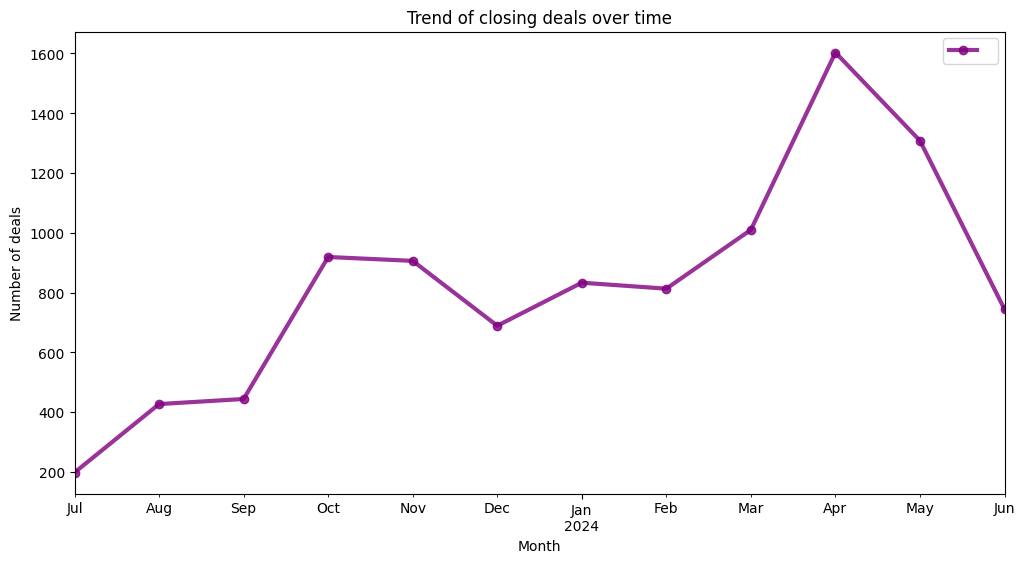

In [ ]:
plt.figure(figsize=(12, 6))
deals_by_month.plot(kind='line', alpha=0.8, label=" ", color ='purple', lw=3, marker='o')
plt.title('Trend of closing deals over time')
plt.xlabel('Month')
plt.ylabel('Number of deals')
plt.xticks(rotation=0)
plt.legend()
plt.show()

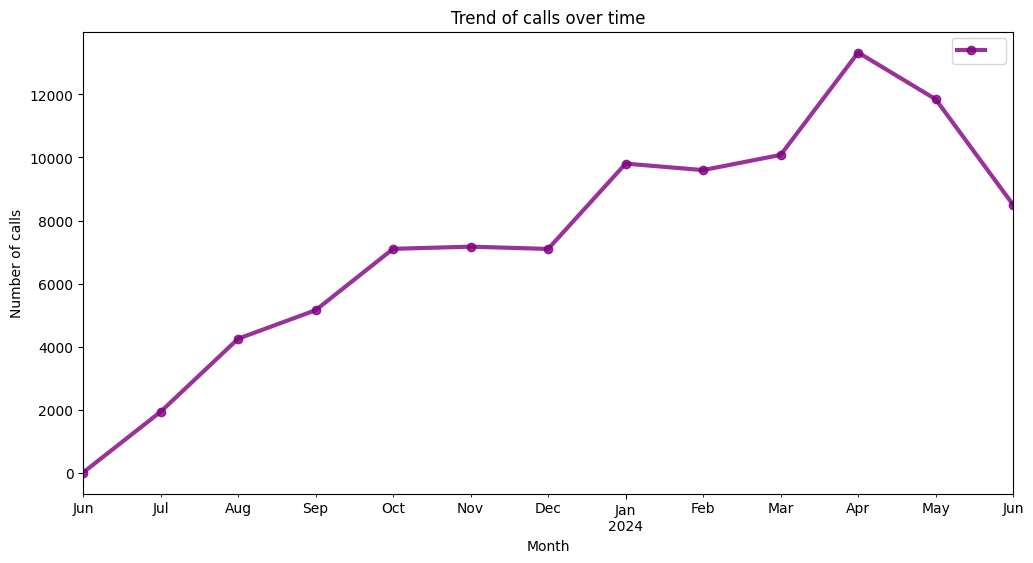

In [ ]:
calls_by_month = call.groupby(call['Call Start Time'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
calls_by_month.plot(kind='line', alpha=0.8, label=" ", color ='purple', lw=3, marker='o')
plt.title('Trend of calls over time')
plt.xlabel('Month')
plt.ylabel('Number of calls')
plt.xticks(rotation=0)
plt.legend()
plt.show()

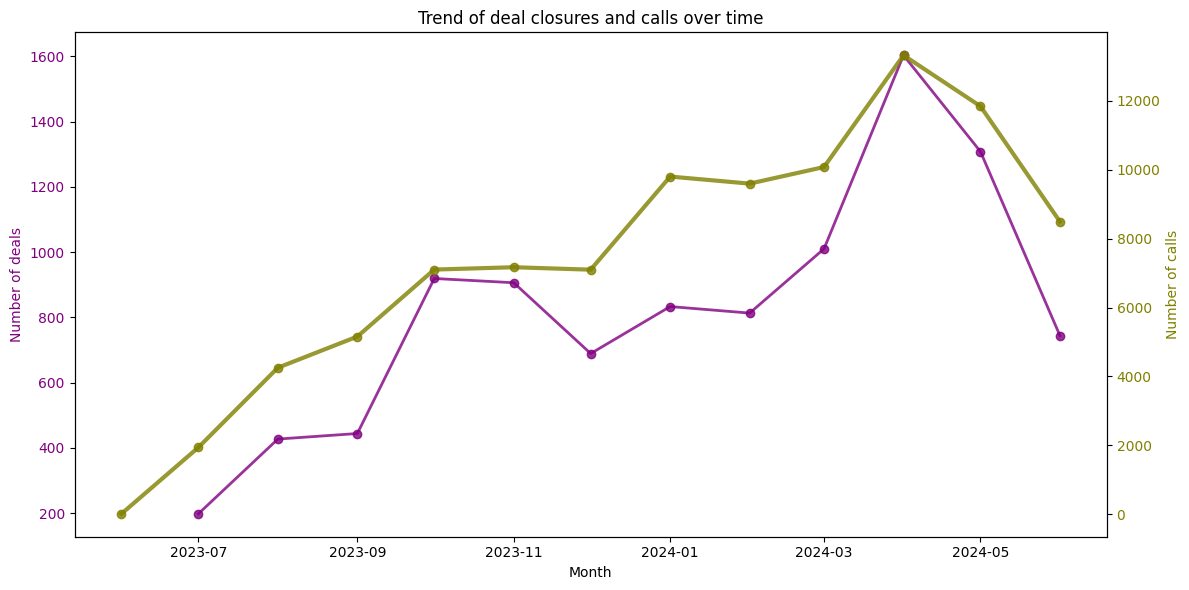

In [ ]:
deals_filtered = deals[deals['Closing Date'] != pd.to_datetime('2025-01-01')]
deals_by_month = deals_filtered.groupby(deals_filtered['Closing Date'].dt.to_period('M')).size()

calls_by_month = call.groupby(call['Call Start Time'].dt.to_period('M')).size()

deals_by_month.index = deals_by_month.index.to_timestamp()
calls_by_month.index = calls_by_month.index.to_timestamp()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(deals_by_month.index, deals_by_month.values, alpha=0.8, color='purple', lw=2, marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of deals', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()
ax2.plot(calls_by_month.index, calls_by_month.values, alpha=0.8, color='olive', lw=3, marker='o')
ax2.set_ylabel('Number of calls', color='olive')
ax2.tick_params(axis='y', labelcolor='olive')


plt.title('Trend of deal closures and calls over time')

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Создаем таблицу для анализа данных по закрытым сделкам и вонками клиентам из двух таблиц.

In [ ]:
call['Call Month'] = call['Call Start Time'].dt.to_period('M')
calls_by_month = call.groupby('Call Month').size()

deals_filtered = deals[deals['Closing Date'] != pd.to_datetime('2025-01-01')]
deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')
deals_by_month = deals_filtered.groupby('Deal Month').size()

summary = pd.DataFrame({
    'Deals': deals_by_month,
    'Calls': calls_by_month
}).fillna(0).astype(int)

print(summary)

         Deals  Calls
2023-06      0      7
2023-07    198   1935
2023-08    427   4251
2023-09    444   5156
2023-10    919   7102
2023-11    906   7170
2023-12    689   7099
2024-01    833   9804
2024-02    813   9599
2024-03   1010  10081
2024-04   1603  13328
2024-05   1308  11847
2024-06    744   8495


<ipython-input-84-8b280e3be7c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')


In [ ]:
# plt.figure(figsize=(8, 6))

# deals_by_month.plot(kind='line', color='green', label='Сделки', marker='o')

# calls_by_month.plot(kind='line', color='purple', label='Звонки', marker='o')

# plt.title('Сравнение закрытия сделок и звонков по месяцам')
# plt.xlabel('Месяц')
# plt.ylabel('Количество')
# plt.legend()
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()

In [ ]:
deals['Created Month'] = deals['Created Time'].dt.to_period('M')
created_by_month = deals.groupby('Created Month').size()

deals_filtered = deals[deals['Closing Date'] != pd.to_datetime('2025-01-01')]
deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')
closed_by_month = deals_filtered.groupby('Deal Month').size()

summary = pd.DataFrame({
    'Created': created_by_month,
    'Closed': closed_by_month
}).fillna(0).astype(int)
summary = summary[(summary['Created'] != 0)]
summary['Closed Percentage'] = (summary['Closed'] / summary['Created']) * 100
summary

<ipython-input-86-44bd01f3e665>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')


,Created,Closed,Closed Percentage
2023-07,380,198,52.105263
2023-08,686,427,62.244898
2023-09,768,444,57.812500
2023-10,1093,919,84.080512
2023-11,1057,906,85.714286
2023-12,1140,689,60.438596
2024-01,1442,833,57.766990
2024-02,1060,813,76.698113
2024-03,1511,1010,66.843150
2024-04,2103,1603,76.224441


<Figure size 1000x800 with 0 Axes>

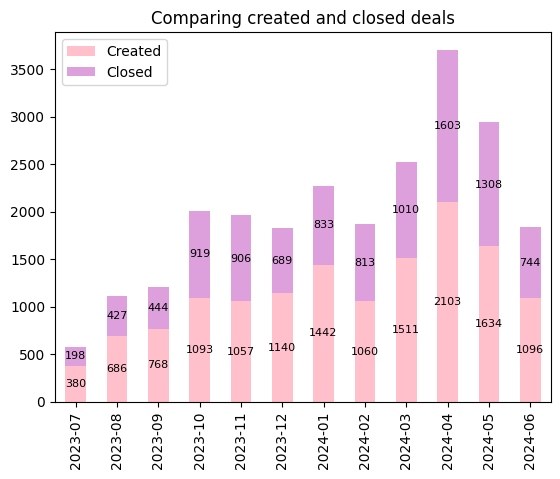

In [ ]:
plt.figure(figsize=(10, 8))
summary[['Created', 'Closed']].plot(kind='bar', stacked=True, color=['pink', 'plum'])

for container in plt.gca().containers:
    plt.bar_label(container, label_type='center', fontsize=8, color='black')

plt.title('Comparing created and closed deals')
plt.show()

Рост числа созданных и закрытых сделок: В целом, наблюдается тенденция к увеличению как количества создаваемых, так и количества закрываемых сделок. Это может свидетельствовать об общем росте бизнеса.
Видна определенная сезонность. В некоторые месяцы (например, в начале года) наблюдается снижение количества создаваемых сделок, что может быть связано с праздничными днями.
Количество созданных сделок превышает закрываемые. Наблюдаются пики и спады в количестве сделок

<ipython-input-88-31664349f904>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deals_filtered['Duration'] = (deals_filtered['Closing Date'] - deals_filtered['Created Time']).dt.days


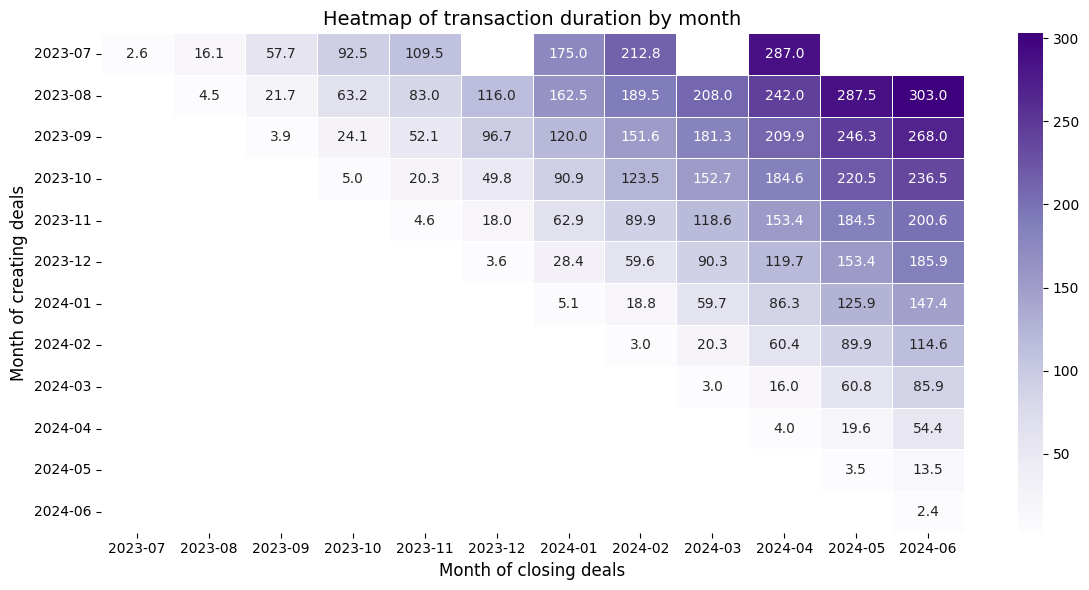

In [ ]:
deals_filtered['Duration'] = (deals_filtered['Closing Date'] - deals_filtered['Created Time']).dt.days
duration_by_month = deals_filtered.groupby('Created Month')['Duration'].mean()

heatmap_data = deals_filtered.groupby(['Created Month', 'Deal Month'])['Duration'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Purples', fmt='.1f', linewidths=0.5)

plt.title('Heatmap of transaction duration by month', fontsize=14)
plt.xlabel('Month of closing deals', fontsize=12)
plt.ylabel('Month of creating deals', fontsize=12)
plt.tight_layout()

plt.show()

Некоторые сделки закрываются очень быстро (несколько дней), а другие могут длиться несколько месяцев.
Существует определенная сезонность в длительности сделок. Например, в начале года (январь-февраль) сделки, как правило, закрываются быстрее, чем в середине или конце года. Месяц, в котором была создана сделка, также влияет на ее длительность. Например, сделки, созданные в начале года, могут закрываться быстрее, чем сделки, созданные в конце года.Есть выбросы, возможно нужно получше почистить данные

<ipython-input-89-2dad37829494>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')


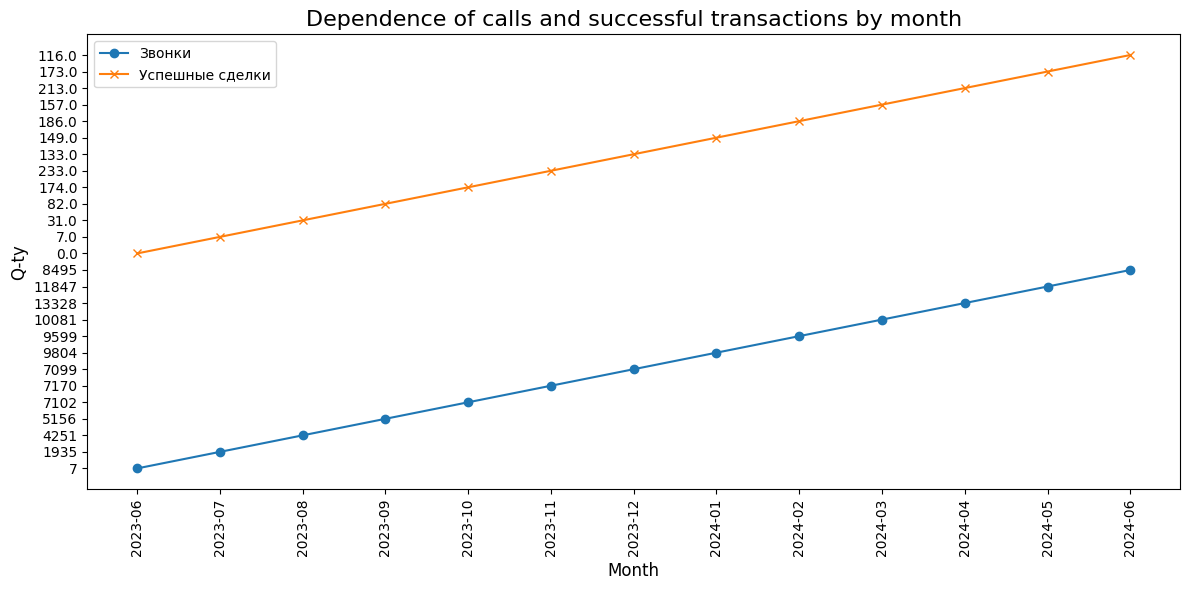

In [ ]:
call['Call Start Time'] = pd.to_datetime(call['Call Start Time'])
deals['Closing Date'] = pd.to_datetime(deals['Closing Date'])

deals['Successful'] = (deals['Initial Amount Paid'] > 0).astype(int)
call['Call Month'] = call['Call Start Time'].dt.to_period('M')
calls_by_month = call.groupby('Call Month').size()


deals_filtered = deals[deals['Closing Date'] != pd.to_datetime('2025-01-01')]
deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')

deals_by_month = deals_filtered.groupby('Deal Month').agg(
    total_deals=('Deal Month', 'size'),
    successful_deals=('Successful', 'sum'),
    min_closing_date=('Closing Date', 'min'),
    max_closing_date=('Closing Date', 'max')
)

calls_by_month_times = call.groupby('Call Month').agg(
    min_call_time=('Call Start Time', 'min'),
    max_call_time=('Call Start Time', 'max')
)
summary = pd.DataFrame({
    'Calls': calls_by_month,
    'Successful Deals': deals_by_month['successful_deals'],
    'Min Call Time': calls_by_month_times['min_call_time'],
    'Max Call Time': calls_by_month_times['max_call_time'],
    'Min Closing Date': deals_by_month['min_closing_date'],
    'Max Closing Date': deals_by_month['max_closing_date']
}).fillna(0).astype(str)


plt.figure(figsize=(12, 6))
plt.plot(summary.index.astype(str), summary['Calls'], label='Звонки', marker='o')
plt.plot(summary.index.astype(str), summary['Successful Deals'], label='Успешные сделки', marker='x')


plt.title('Dependence of calls and successful transactions by month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Q-ty', fontsize=12)
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


На графике нет резких скачков или провалов, что свидетельствует о достаточно стабильной динамике. Это может говорить о том, что компания применяет стабильные процессы продаж.Зависимость между двумя показателями выглядит достаточно линейной. Это означает, что с каждым дополнительным звонком количество успешных сделок увеличивается примерно на одно и то же значение.

# **SlA** ХОЧУ ПОСЧИТАТЬ ЗАВИСИМОСТЬ ЗАКРЫТИЯ СДЕЛОК ОТ ВРЕМЕНИ РЕАКЦИИ НА ЗАЯВКУ. СЧИТАЮ ВРЕМЯ отклика и сравниваю с SLA.
Также смотрю успешность сделки в зависимости от SLA

Боксплот демонстрирует, что соблюдение SLA существенно влияет на время отклика

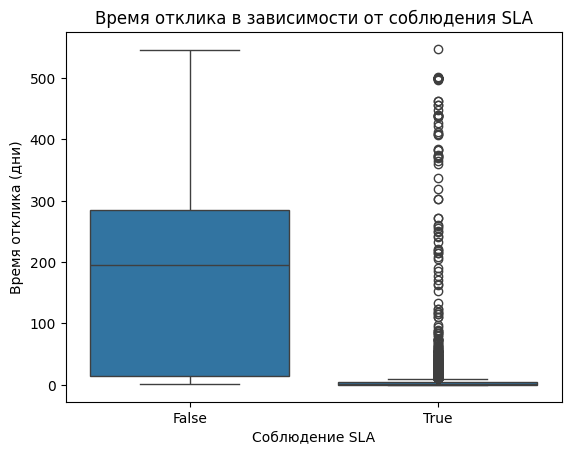

In [ ]:
deals['Response Time'] = (deals['Closing Date'] - deals['Created Time']).dt.days
deals['Response Within SLA'] = deals['Response Time'] <= deals['SLA']

sns.boxplot(data=deals, x='Response Within SLA', y='Response Time')
plt.title('Время отклика в зависимости от соблюдения SLA')
plt.xlabel('Соблюдение SLA')
plt.ylabel('Время отклика (дни)')
plt.show()

# **2. РАБОТА С ТАБЛИЦАМИ SPENT И DEALS. ГРУППИРОВКА ПО ИСТОЧНИКУ РК.**

создала доп столбец успещности сделки

In [ ]:
deals['Is Successful'] = (deals['Initial Amount Paid'] > 0)
deals_grouped = deals.groupby(['Source']).agg({
    'Contact Name': 'count',
    'Campaign': 'count',
    'Offer Total Amount': 'sum',
    'Initial Amount Paid': 'sum',
    'Is Successful': 'sum'
})

In [ ]:
deals.head()

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Campaign,SLA,Source,Payment Type,Product,...,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2,Created Month,Successful,Response Time,Response Within SLA,Is Successful
0,5805028000007843060,Ulysses Adams,2025-01-01,Payment Done,No reason,04.07.23recentlymoved_DE,0.016667,Facebook Ads,Recurring Payments,Digital Marketing,...,11960.0,5805028000007854069,Unknown,Unknown,Medium,2023-09,1,474,False,True
1,5805028000007754120,Cara Iverson,2023-11-12,Payment Done,No reason,work_DE,13.890278,Telegram posts,Recurring Payments,Digital Marketing,...,11960.0,5805028000007742068,Unknown,Unknown,Low,2023-09,1,59,False,True
2,5805028000007744074,Jane Smith,2023-10-18,Payment Done,No reason,work_DE,0.543333,Telegram posts,Recurring Payments,Digital Marketing,...,11960.0,5805028000007761132,Unknown,Unknown,Low,2023-09,1,34,False,True
3,5805028000007647107,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,5.526111,Youtube Ads,Recurring Payments,Digital Marketing,...,11960.0,5805028000007649089,Unknown,Unknown,Medium,2023-09,1,0,True,True
4,5805028000007623014,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,2.800833,Youtube Ads,Recurring Payments,Digital Marketing,...,11960.0,5805028000007595085,Unknown,Unknown,Non Target,2023-09,1,0,True,True


In [ ]:
spent_grouped = spent.groupby(['Source']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spend': 'sum'
})

In [ ]:
campaign_summary = pd.merge(deals_grouped, spent_grouped, on=['Source'], how='inner').reset_index()
campaign_summary.head()


,Source,Contact Name,Campaign,Offer Total Amount,Initial Amount Paid,Is Successful,Impressions,Clicks,Spend
0,Bloggers,715,715,1630500.0,186300.0,166,411029,10163,13439.00
1,Facebook Ads,3876,3876,8352166.0,907358.0,847,2850200,48133,33754.72
2,Google Ads,3670,3670,5861040.0,728248.0,628,32752333,248487,57798.60
3,SMM,625,625,2907060.0,430930.0,321,23772,1824,7269.52
4,Telegram posts,828,828,1635575.0,225048.0,164,556077,13496,6860.36


In [ ]:
campaign_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Source               9 non-null      object 
 1   Contact Name         9 non-null      Int64  
 2   Campaign             9 non-null      int64  
 3   Offer Total Amount   9 non-null      float64
 4   Initial Amount Paid  9 non-null      float64
 5   Is Successful        9 non-null      int64  
 6   Impressions          9 non-null      int64  
 7   Clicks               9 non-null      int64  
 8   Spend                9 non-null      float64
dtypes: Int64(1), float64(3), int64(4), object(1)
memory usage: 789.0+ bytes


# **Сгруппировала по источникам и посчитала количество сделок, конверсию**

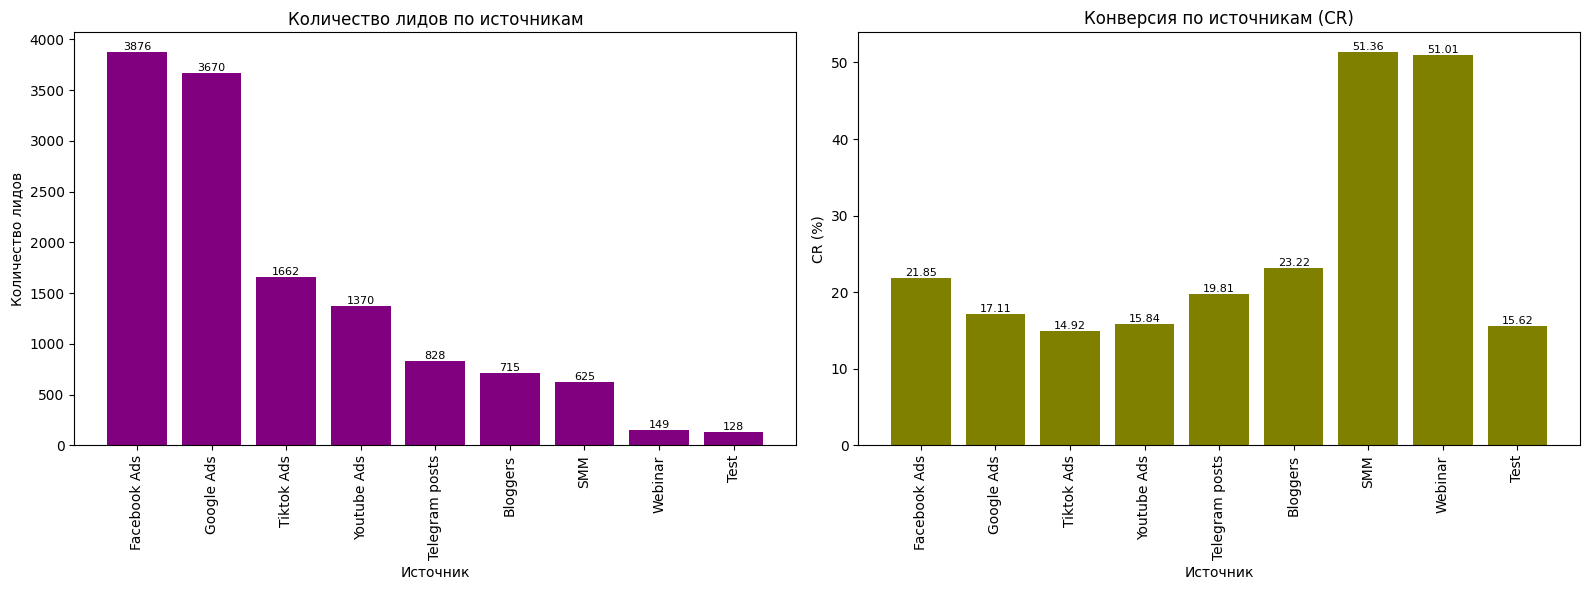

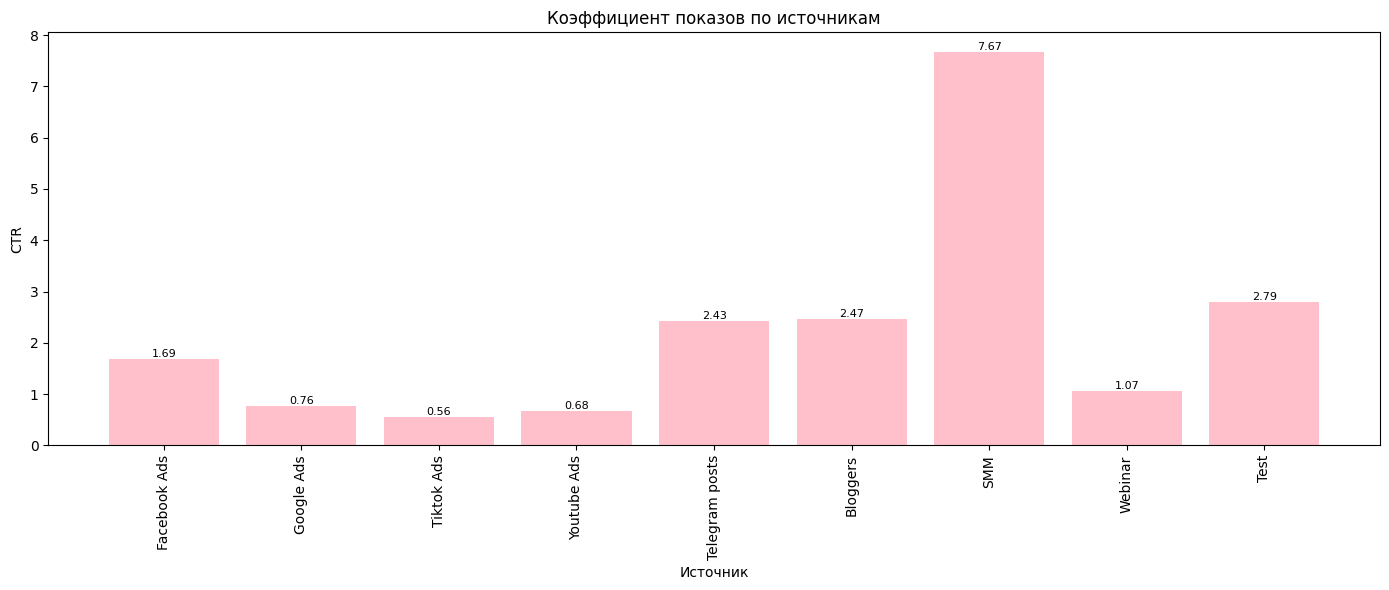

In [ ]:
campaign_summary['CR'] = (campaign_summary['Is Successful'] / campaign_summary['Contact Name']) * 100
campaign_summary['CTR'] = (campaign_summary['Clicks'] / campaign_summary['Impressions']) * 100
campaign_summary['CPC'] = campaign_summary['Spend'] / campaign_summary['Clicks']
campaign_summary['CPL'] = campaign_summary['Spend'] / campaign_summary['Contact Name']

campaign_summary['CR'] = campaign_summary['CR'].round(2)
campaign_summary['CTR'] = campaign_summary['CTR'].round(2)

campaign_summary_sorted = campaign_summary.sort_values(by='Contact Name', ascending=False)


fig, axes = plt.subplots(ncols=2, figsize=(16, 6))


axes[0].bar(campaign_summary_sorted['Source'], campaign_summary_sorted['Contact Name'], color='purple')
axes[0].set_title('Количество лидов по источникам')
axes[0].set_xlabel('Источник')
axes[0].set_ylabel('Количество лидов')
axes[0].tick_params(axis='x', rotation=90)
for container in axes[0].containers:
    axes[0].bar_label(container, labels=campaign_summary_sorted['Contact Name'], fontsize=8, color='black')

axes[1].bar(campaign_summary_sorted['Source'], campaign_summary_sorted['CR'], color='olive')
axes[1].set_title('Конверсия по источникам (CR)')
axes[1].set_xlabel('Источник')
axes[1].set_ylabel('CR (%)')
axes[1].tick_params(axis='x', rotation=90)
for container in axes[1].containers:
    axes[1].bar_label(container, labels=campaign_summary_sorted['CR'], fontsize=8, color='black')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.bar(campaign_summary_sorted['Source'], campaign_summary_sorted['CTR'], color='pink')

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', labels=campaign_summary_sorted['CTR'], fontsize=8, color='black')

plt.title('Коэффициент показов по источникам')
plt.xlabel('Источник')
plt.ylabel('CTR')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Наиболее эффективные каналы: Facebook Ads, Google Ads, TikTok Ads демонстрируют наибольшее количество привлеченных лидов.Facebook Ads, Google Ads демонстрируют наивысшую конверсию лидов в клиентов.

Построение зависимостей. Изначально смотрю стоимость и конверсию. Затем выстроила зависимость всех маркетинговых метрик в тепловой карте

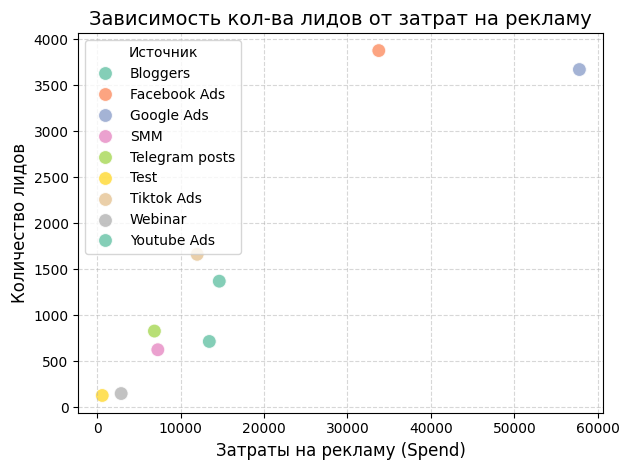

In [ ]:
sns.scatterplot(
    data=campaign_summary,
    x='Spend',
    y='Contact Name',
    hue='Source',
    palette='Set2',
    s=100,
    alpha=0.8
)


plt.title('Зависимость кол-ва лидов от затрат на рекламу', fontsize=14)
plt.xlabel('Затраты на рекламу (Spend)', fontsize=12)
plt.ylabel('Количество лидов', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Источник')
plt.tight_layout()
plt.show()




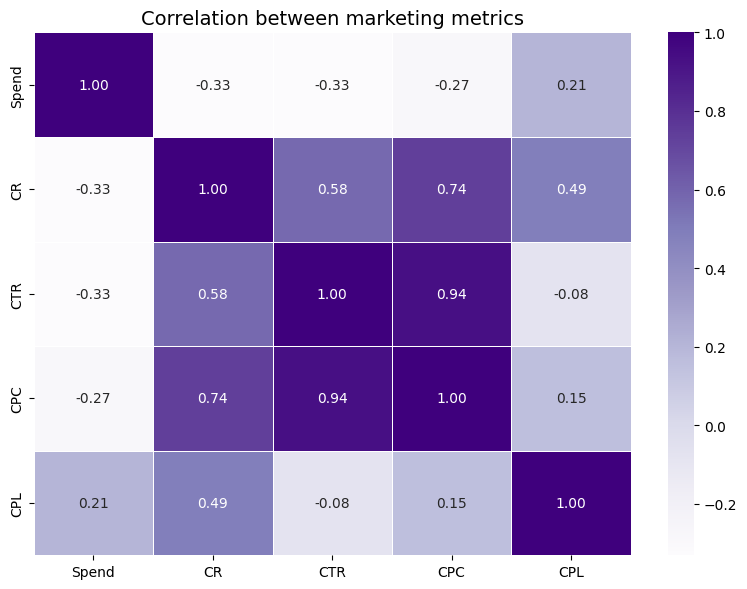

In [ ]:

correlation_matrix = campaign_summary[['Spend', 'CR', 'CTR', 'CPC', 'CPL']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title('Correlation between marketing metrics', fontsize=14)
plt.tight_layout()
plt.show()

CTR и CPC имеют очень высокую положительную корреляцию (0.94): Это означает, что чем выше кликабельность (CTR), тем выше стоимость за клик (CPC). Это логично

CR и CTR имеют умеренную положительную корреляцию (0.74): Это говорит о том, что более привлекательные объявления - визуально и призыв к действию корректен (высокий CTR) могут приводить к более высокой конверсии (CR). Однако, связь не столь сильная, как между CTR и CPC.
CR и CPC имеют умеренную положительную корреляцию (0.74): Это может означать, что кампании с более высокой стоимостью за клик могут приводить к более высокой конверсии. Однако, следует помнить о других факторах, влияющих на конверсию.
Spend и CR имеют слабую положительную корреляцию (0.21): Увеличение затрат на рекламу не всегда приводит к значительному повышению конверсии. Это может быть связано с тем, что не все затраты эффективны.
Spend и CPL имеют слабую отрицательную корреляцию (-0.27): Это может указывать на то, что при увеличении затрат на привлечение одного лида (CPL) общие затраты на кампанию также увеличиваются.
Выводы:

Оптимизация CTR: Повышение качественности объявлений может привести к увеличению как CPC, так и CR.
Баланс между CPC и конверсией: Необходимо найти баланс между стоимостью за клик и конверсией. Высокий CPC не всегда гарантирует высокую конверсию.
Анализ затрат: Необходимо внимательно анализировать, как расходуются рекламные бюджеты. Не всегда увеличение затрат приводит к пропорциональному росту конверсии.
Дополнительные факторы: Корреляционный анализ позволяет выявить связи между показателями, но не дает причинно-следственных связей. Для более глубокого понимания необходимо учитывать другие факторы, такие как качество креативов, целевая аудитория, сезонность и т.д.

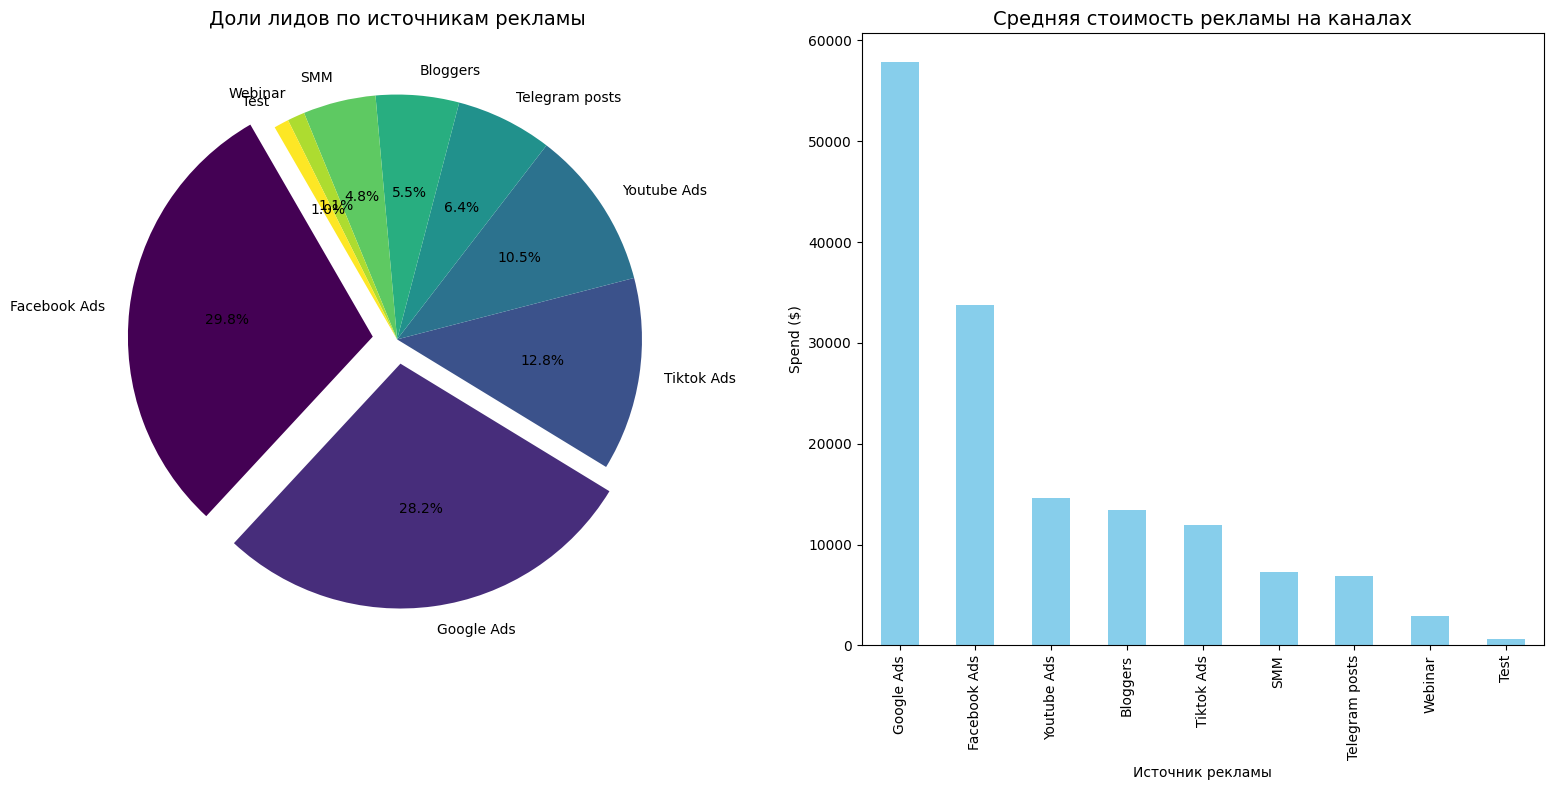

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0, 0)
campaign_summary_sorted.set_index('Source')['Contact Name'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=120,
    cmap='viridis',
    explode=explode,
    ax=axes[0]
)

axes[0].set_title('Доли лидов по источникам рекламы', fontsize=14)
axes[0].set_ylabel('')

average_cost = campaign_summary_sorted.groupby('Source')['Spend'].mean().sort_values(ascending=False)
average_cost.plot(
    kind='bar',
    color='skyblue',
    ax=axes[1]
)

axes[1].set_title('Средняя стоимость рекламы на каналах', fontsize=14)
axes[1].set_xlabel('Источник рекламы')
axes[1].set_ylabel('Spend ($)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
deals_grouped_by_campaign = deals.groupby(['Campaign']).agg({
    'Contact Name': 'count',
    'Is Successful': 'sum'
})

In [ ]:
spent_grouped_by_campaign = spent.groupby(['Campaign']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spend': 'sum'
})

In [ ]:
campaign_summary_by_campaign = pd.merge(deals_grouped_by_campaign, spent_grouped_by_campaign, on=['Campaign'], how='inner').reset_index()
campaign_summary_by_campaign.head()


,Campaign,Contact Name,Is Successful,Impressions,Clicks,Spend
0,01.04.23women_PL,29,0,45956,367,357.25
1,02.05.24test_DE,115,7,20047,790,164.04
2,02.07.23wide_DE,826,178,594807,10281,6913.60
3,02.08.23interests_DE,5,0,5990,76,69.30
4,03.07.23women,514,113,348089,7139,4219.75


In [ ]:
campaign_summary_by_campaign['CTR'] = (campaign_summary_by_campaign['Clicks'] / campaign_summary_by_campaign['Impressions']) * 100
campaign_summary_by_campaign['CR'] = (campaign_summary_by_campaign['Is Successful'] / campaign_summary_by_campaign['Contact Name']) * 100

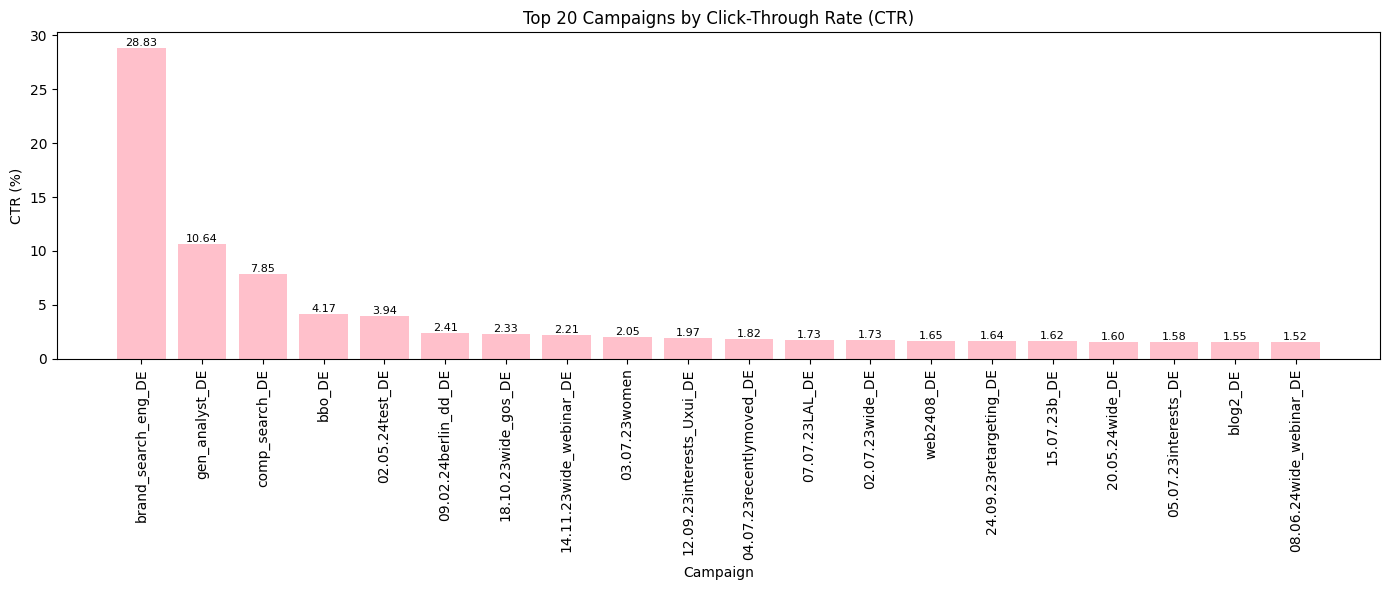

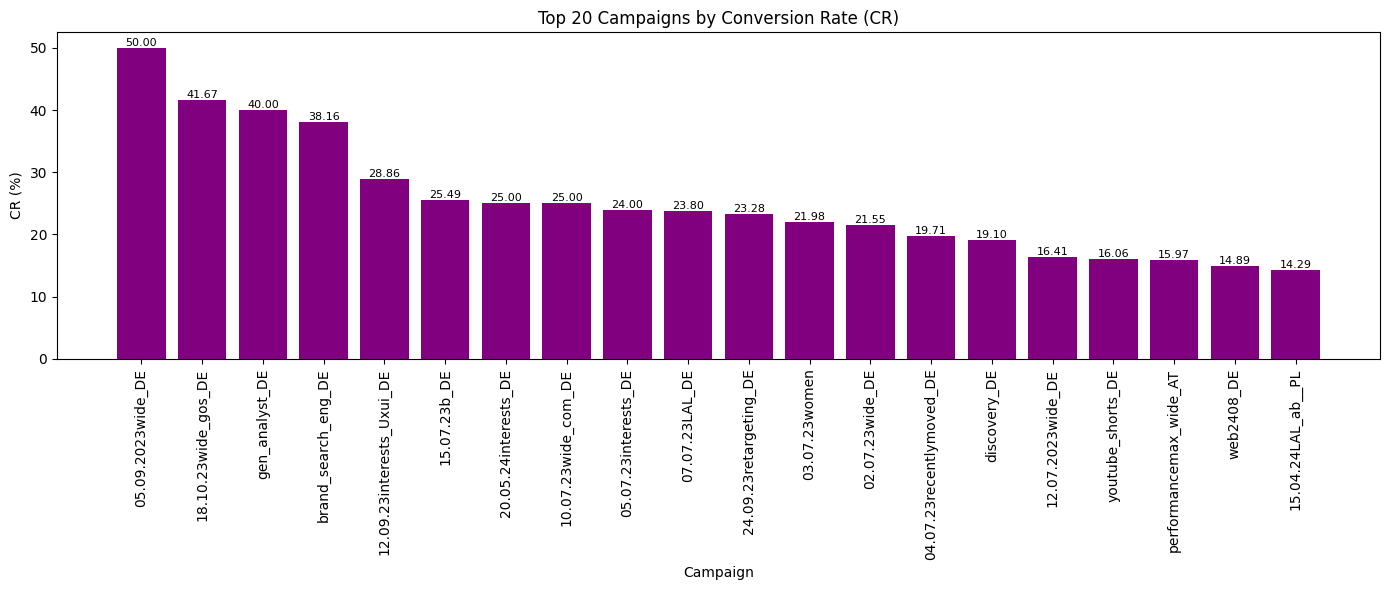

In [ ]:
campaign_summary_by_campaign_sorted_ctr = campaign_summary_by_campaign.sort_values(by='CTR', ascending=False)
campaign_summary_by_campaign_sorted_cr = campaign_summary_by_campaign.sort_values(by='CR', ascending=False)

filter = campaign_summary_by_campaign_sorted_ctr['Campaign'] != 'No campaign'
campaign_summary_by_campaign_sorted_ctr = campaign_summary_by_campaign_sorted_ctr[filter]
top_20_ctr = campaign_summary_by_campaign_sorted_ctr.head(20)


plt.figure(figsize=(14, 6))
bars_ctr = plt.bar(top_20_ctr['Campaign'], top_20_ctr['CTR'], color='pink')
plt.title('Top 20 Campaigns by Click-Through Rate (CTR)')
plt.xlabel('Campaign')
plt.ylabel('CTR (%)')
plt.xticks(rotation=90)
plt.tight_layout()

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=8, color='black', fmt="%.2f")

plt.show()

filter = campaign_summary_by_campaign_sorted_cr['Campaign'] != 'No campaign'
campaign_summary_by_campaign_sorted_cr = campaign_summary_by_campaign_sorted_cr[filter]
top_20_cr = campaign_summary_by_campaign_sorted_cr.head(20)


plt.figure(figsize=(14, 6))
bars_cr = plt.bar(top_20_cr['Campaign'], top_20_cr['CR'], color='purple')
plt.title('Top 20 Campaigns by Conversion Rate (CR)')
plt.xlabel('Campaign')
plt.ylabel('CR (%)')
plt.xticks(rotation=90)
plt.tight_layout()

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=8, color='black', fmt="%.2f")

plt.show()

Отсутствие прямой корреляции между CTR и CR. Сильно различаются кампании по результатам. Причины различий могут быть связаны с различными факторами, такими как целевая аудитория, креатив, посадочная страница, ставки

# **Создаю группировку Ресурс и кампания и в графиках показываю СTR , CR**

In [ ]:
deals_source_grouped = deals.groupby(['Source', 'Campaign']).agg({
    'Contact Name': 'count',  # Количество сделок
    'Is Successful': 'sum'}
                                                                 )

In [ ]:
spent_sourse_grouped = spent.groupby(['Source', 'Campaign']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spend': 'sum'
})

In [ ]:
cam_source_summary = pd.merge(deals_source_grouped, spent_sourse_grouped, on=['Source', 'Campaign'], how='inner')
cam_source_summary.reset_index(inplace=True)
cam_source_summary = cam_source_summary.fillna(0)
cam_source_summary. tail()

,Source,Campaign,Contact Name,Is Successful,Impressions,Clicks,Spend
43,Webinar,bbo_DE,6,4,3069,128,200.00
44,Webinar,web2408_DE,9,6,9315,154,189.04
45,Youtube Ads,shorts_PL,3,0,89763,685,234.83
46,Youtube Ads,youtube_shorts_DE,1354,217,8481054,57873,14149.22
47,Youtube Ads,youtube_shortsin_AT,13,0,85161,503,249.28


In [ ]:
cam_source_summary['CTR'] = (cam_source_summary['Clicks'] / cam_source_summary['Impressions']) * 100
cam_source_summary['CR'] = (cam_source_summary['Is Successful'] / cam_source_summary['Contact Name']) * 100
cam_source_summary['CPL'] = cam_source_summary['Spend'] / cam_source_summary['Contact Name']

cam_source_summary['CTR'] = cam_source_summary['CTR'].fillna(0)
cam_source_summary['CR'] = cam_source_summary['CR'].fillna(0)
cam_source_summary['CPL'] = cam_source_summary['CPL'].fillna(0)



cam_source_summary.head()


,Source,Campaign,Contact Name,Is Successful,Impressions,Clicks,Spend,CTR,CR,CPL
0,Bloggers,No campaign,52,52,411029,10163,13439.00,2.472575,100.0,258.442308
1,Facebook Ads,01.04.23women_PL,29,0,45956,367,357.25,0.798590,0.0,12.318966
2,Facebook Ads,02.07.23wide_DE,826,178,594807,10281,6913.60,1.728460,21.549637,8.369976
3,Facebook Ads,02.08.23interests_DE,5,0,5990,76,69.30,1.268781,0.0,13.86
4,Facebook Ads,03.07.23women,514,113,348089,7139,4219.75,2.050912,21.984436,8.20963


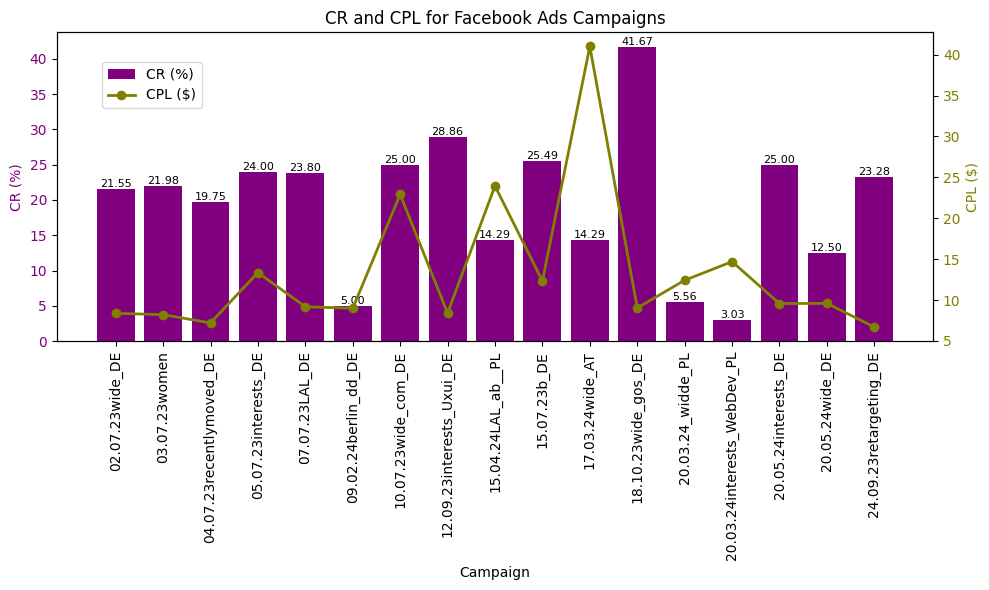

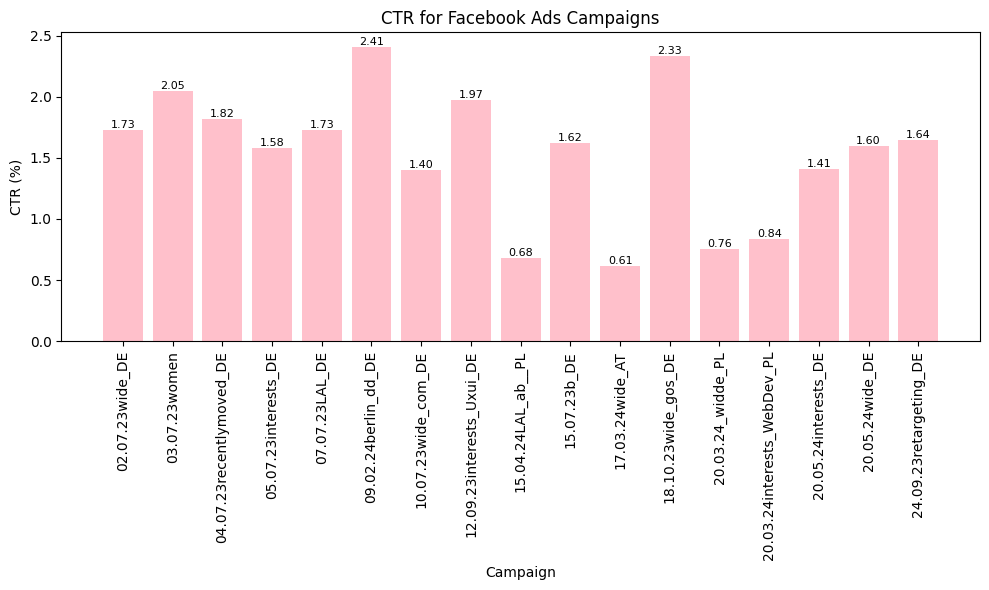

In [ ]:
facebook_data = cam_source_summary[cam_source_summary['Source'] == 'Facebook Ads']
fb_data_filtered = facebook_data[(facebook_data['CTR'] > 0) & (facebook_data['CR'] > 0) & (facebook_data['CPL'] > 0)]

fig, ax1 = plt.subplots(figsize=(10, 6))

bars_cr = ax1.bar(fb_data_filtered['Campaign'], fb_data_filtered['CR'], color='purple', label='CR (%)')
ax1.set_xlabel('Campaign')
ax1.set_ylabel('CR (%)', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.bar_label(bars_cr, label_type='edge', fontsize=8, color='black', fmt="%.2f")
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(fb_data_filtered['Campaign'], fb_data_filtered['CPL'], color='olive', marker='o', label='CPL ($)', linewidth=2)
ax2.set_ylabel('CPL ($)', color='olive')
ax2.tick_params(axis='y', labelcolor='olive')


fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)
plt.title('CR and CPL for Facebook Ads Campaigns')
plt.tight_layout()
plt.show()


#++++++++++++++++++++++++++++++
plt.figure(figsize=(10, 6))
bars = plt.bar(fb_data_filtered['Campaign'], fb_data_filtered['CTR'], color='pink')

plt.bar_label(bars, label_type='edge', fontsize=8, color='black', fmt="%.2f")
plt.xlabel('Campaign')
plt.ylabel('CTR (%)')
plt.title('CTR for Facebook Ads Campaigns')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

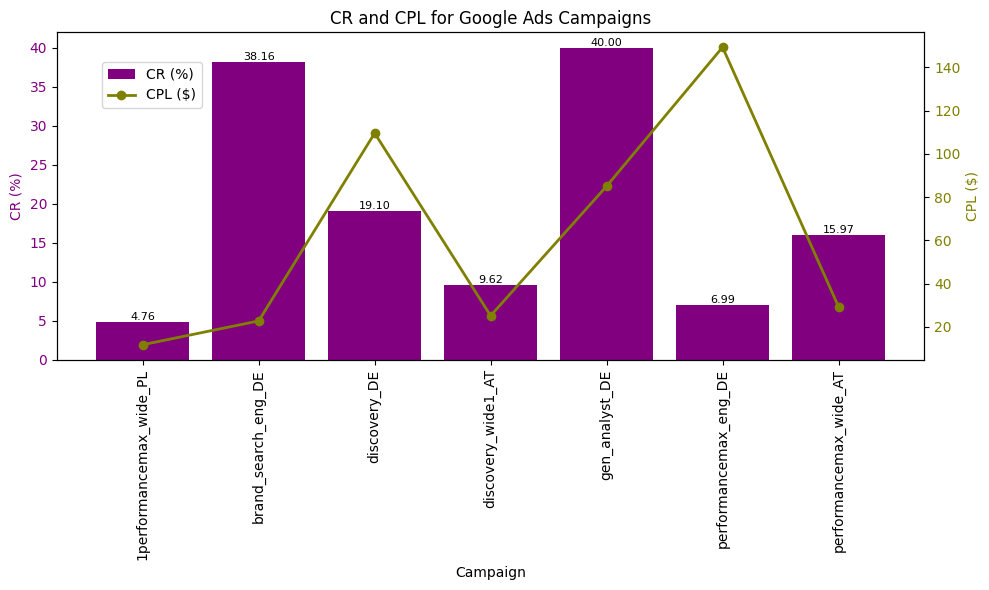

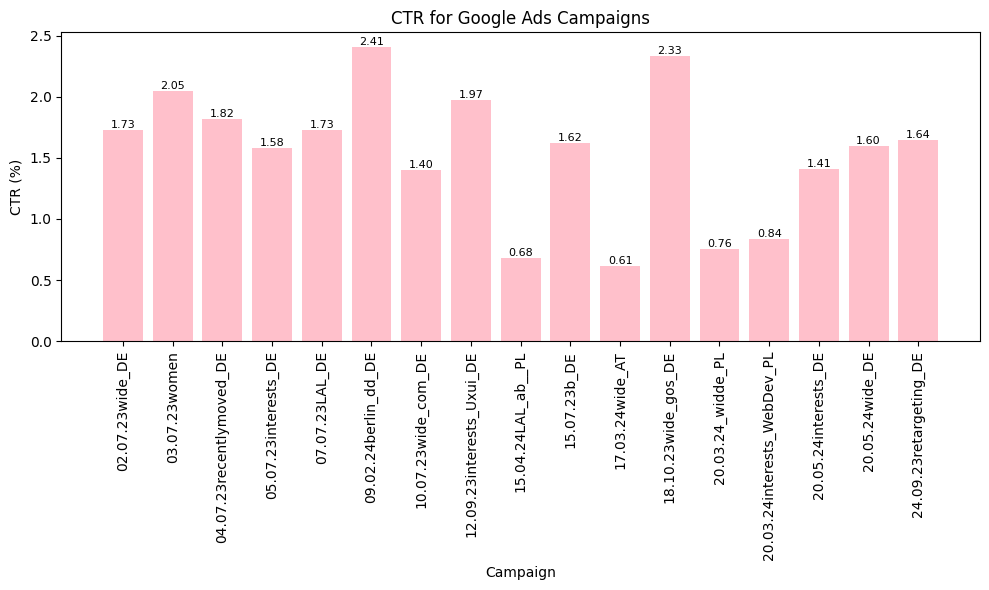

In [ ]:
google_data = cam_source_summary[cam_source_summary['Source'] == 'Google Ads']
g_data_filtered = google_data[(google_data['CTR'] > 0) & (google_data['CR'] > 0) & (google_data['CPL'] > 0)]

fig, ax1 = plt.subplots(figsize=(10, 6))

bars_cr = ax1.bar(g_data_filtered['Campaign'], g_data_filtered['CR'], color='purple', label='CR (%)')
ax1.set_xlabel('Campaign')
ax1.set_ylabel('CR (%)', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.bar_label(bars_cr, label_type='edge', fontsize=8, color='black', fmt="%.2f")
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(g_data_filtered['Campaign'], g_data_filtered['CPL'], color='olive', marker='o', label='CPL ($)', linewidth=2)
ax2.set_ylabel('CPL ($)', color='olive')
ax2.tick_params(axis='y', labelcolor='olive')


fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)
plt.title('CR and CPL for Google Ads Campaigns')
plt.tight_layout()
plt.show()


#++++++++++++++++++++++++++++++
plt.figure(figsize=(10, 6))
bars = plt.bar(fb_data_filtered['Campaign'], fb_data_filtered['CTR'], color='pink')

plt.bar_label(bars, label_type='edge', fontsize=8, color='black', fmt="%.2f")
plt.xlabel('Campaign')
plt.ylabel('CTR (%)')
plt.title('CTR for Google Ads Campaigns')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

СМОТРЮ КАКАЯ ЕСТЬ КОРРЕЛЯЦИЯ МЕЖДУ ВОВЛЕЧЕНИЕМ, кОЛИЧЕСТВОМ КЛИКОВ И ЗАТРАТАМИ

# **Географический анализ:**
1. Проанализируйте географическое распределение сделок по городам.
2. Изучите влияние уровня знания немецкого языка на успешность сделок в разных городах.


In [ ]:
deals['Status'] = np.where(deals['Initial Amount Paid'] > 0, 'Successful', 'Unsuccessful')
successful_deals_count = (deals['Status'] == 'Successful').sum()
successful_deals_count

3211

In [ ]:
language_success = deals.groupby(['City', 'Level of Deutsch', 'Status']).size().reset_index(name='Deal Count')
language_success

,City,Level of Deutsch,Status,Deal Count
0,Aachen,B1,Successful,5
1,Aachen,Unknown,Successful,4
2,Aalen,Unknown,Successful,1
3,Abensberg,Unknown,Successful,1
4,Achberg,Unknown,Successful,1
...,...,...,...,...
1090,Zwingenberg,Unknown,Successful,1
1091,Öhringen,Unknown,Successful,1
1092,Übelbach,Unknown,Successful,1
1093,Überlingen,Unknown,Unsuccessful,1


In [ ]:
language_success['Level of Deutsch'].unique()

array(['B1', 'Unknown', 'B2', 'A2', 'C1', 'A1', 'C2'], dtype=object)

TOP 20 городов с успешными сделками по языку

Из графика видно, что уровень владения немецким языком оказывает существенное влияние на успешность сделки. В целом, с повышением уровня языка наблюдается тенденция к увеличению числа успешных сделок.
Наиболее успешный уровень: Уровень B2 демонстрирует наибольшее количество успешных сделок. Это может свидетельствовать о том, что именно этот уровень владения языком является оптимальным для заключения сделок в данной сфере.

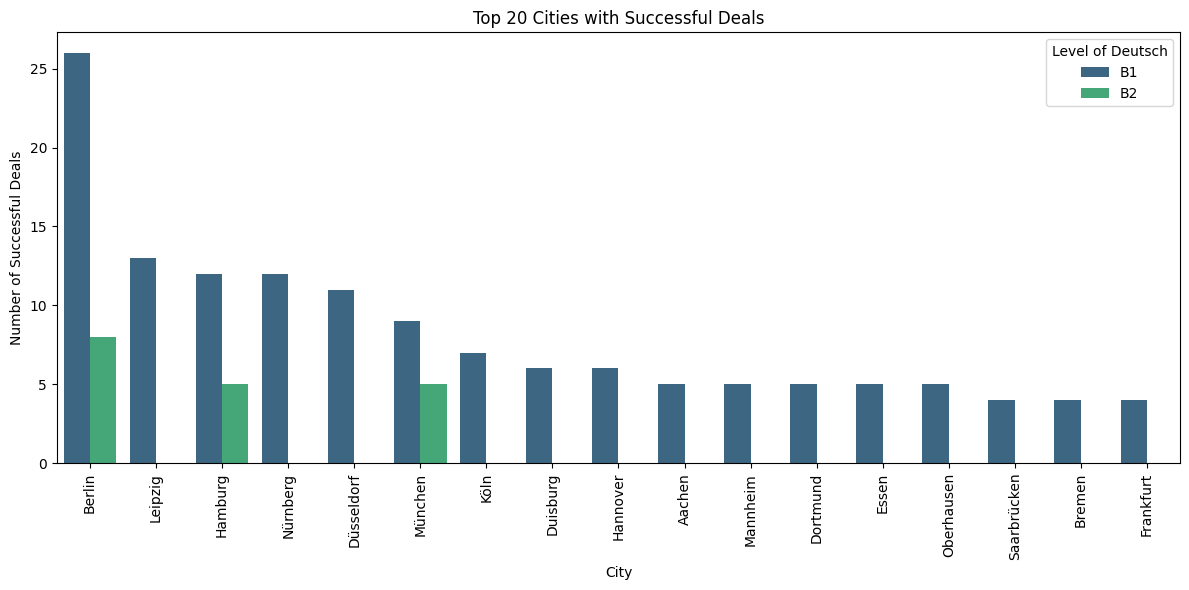

In [ ]:
successful_deals = language_success[(language_success['Status'] == 'Successful') & (language_success['City'] != 'Unknown')  & (language_success['Level of Deutsch'] != 'Unknown')  ]
successful_deals = successful_deals.sort_values(by='Deal Count', ascending=False)
top_successful_deals = successful_deals.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals, palette='viridis', hue='Level of Deutsch')

plt.title('Top 20 Cities with Successful Deals')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

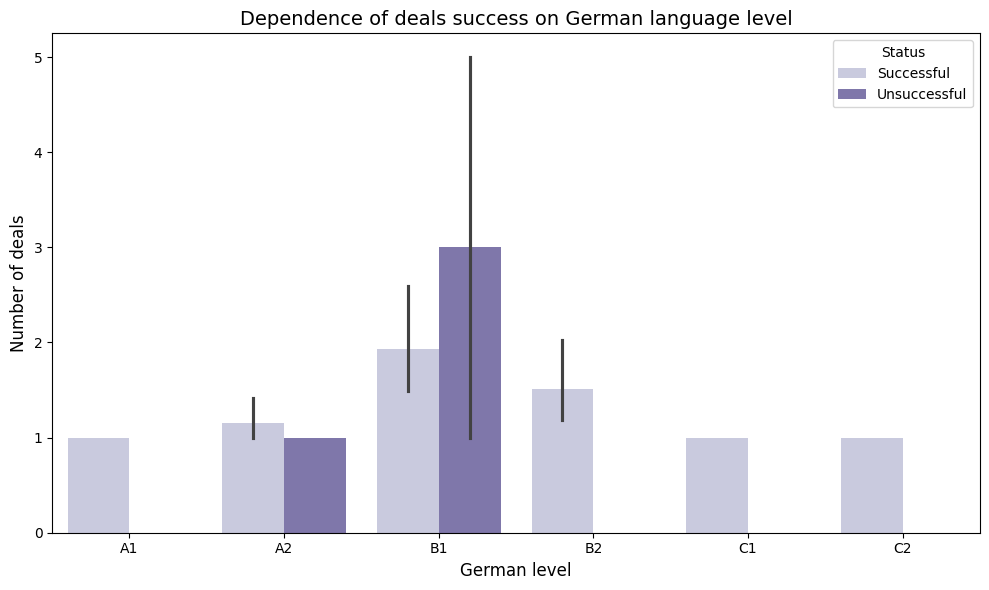

In [ ]:
order = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']

language_success['Level of Deutsch'] = pd.Categorical(language_success['Level of Deutsch'], categories=order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=language_success, x='Level of Deutsch', y='Deal Count', hue='Status', palette='Purples')

plt.title('Dependence of deals success on German language level', fontsize=14)
plt.xlabel('German level', fontsize=12)
plt.ylabel('Number of deals', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

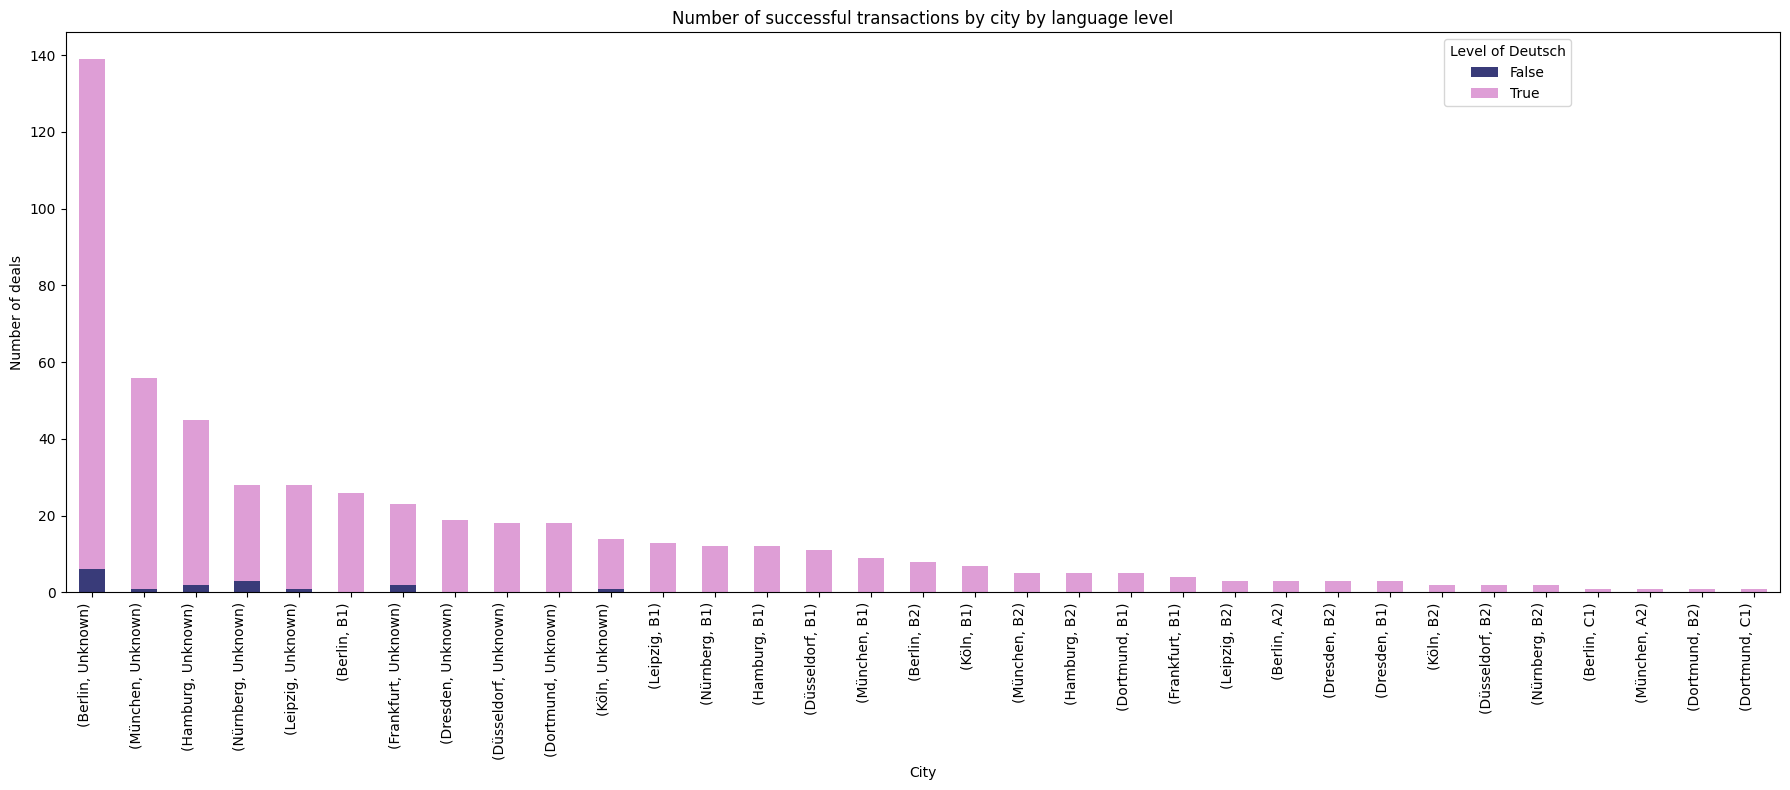

In [ ]:
df_filtered = deals[(deals['City'] != 'Unknown')]

top_cities = df_filtered[df_filtered['Is Successful'] == True].groupby('City').size()
top_cities_sorted = top_cities.sort_values(ascending=False).head(10).index

df_top_cities = df_filtered[df_filtered['City'].isin(top_cities_sorted)]

grouped = df_top_cities.groupby(['City', 'Level of Deutsch', 'Is Successful']).size().unstack(fill_value=0)
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]


fig, ax = plt.subplots(figsize=(18, 8))

grouped.plot(kind='bar', stacked=True, ax=ax, colormap='tab20b')


plt.title('Number of successful transactions by city by language level')
plt.xlabel('City')
plt.ylabel('Number of deals')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Level of Deutsch', bbox_to_anchor=(0.8, 1), loc='upper left')


plt.tight_layout()
plt.show()


# НА ВСЯКИЙ СЛУЧАЙ ПОСТРОИЛА СКАТТЕРПЛОТ ПО РАСПРЕДЕЛЕНИЮ КЛИЕНТОВ, ОПЛАТИВШИХ (УСПЕШНЫЕ СДЕЛКИ)

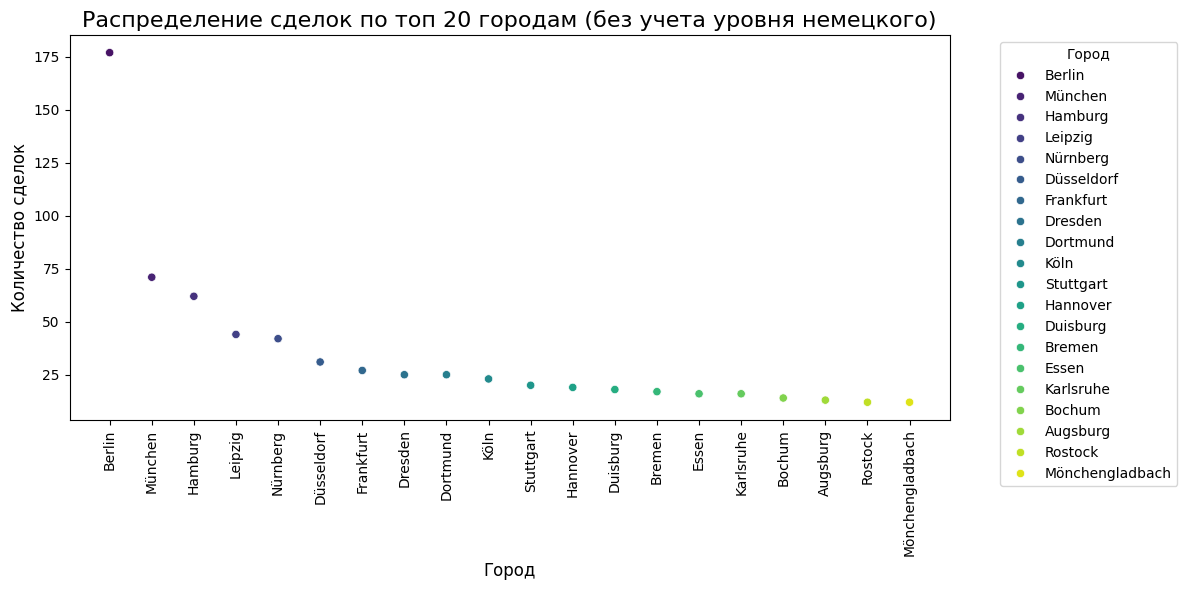

In [ ]:
city_deals_count = language_success[(language_success['City'] != 'Unknown') & (language_success['Level of Deutsch'] != 'Unknown')]

# Игнор уровень немецкого языка
city_deals_count = city_deals_count.groupby('City').agg({'Deal Count': 'sum'}).reset_index()
top_city_deals = city_deals_count.sort_values(by='Deal Count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_city_deals, x='City', y='Deal Count', hue='City', palette='viridis')
plt.title('Распределение сделок по топ 20 городам (без учета уровня немецкого)', fontsize=16)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество сделок', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Город', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

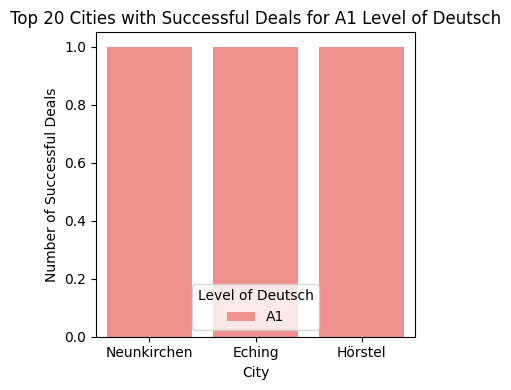

In [ ]:
successful_deals_A1 = successful_deals[successful_deals['Level of Deutsch'] == 'A1']
successful_deals_A1 = successful_deals_A1.sort_values(by='Deal Count', ascending=False)
top_successful_deals_A1 = successful_deals_A1.head(20)

# Строим график для уровня A1
plt.figure(figsize=(4, 4))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals_A1, palette='spring', hue='Level of Deutsch' )
plt.title('Top 20 Cities with Successful Deals for A1 Level of Deutsch')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

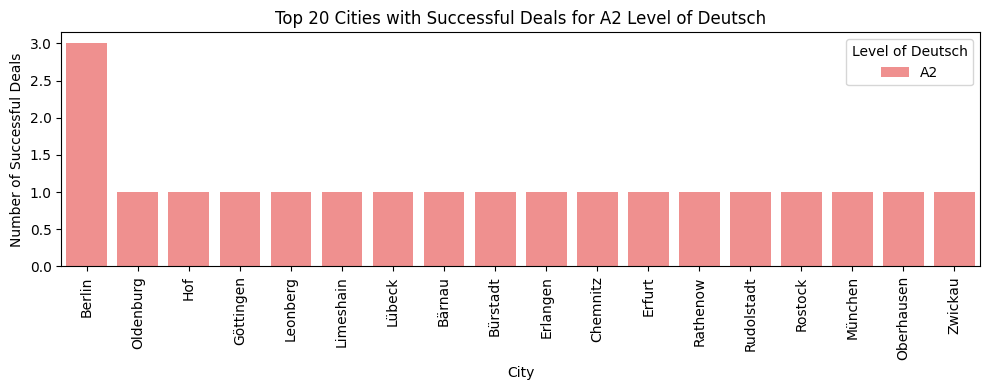

In [ ]:
successful_deals_A2 = successful_deals[successful_deals['Level of Deutsch'] == 'A2']
successful_deals_A2 = successful_deals_A2.sort_values(by='Deal Count', ascending=False)
top_successful_deals_A2 = successful_deals_A2.head(20)

# Строим график для уровня A2
plt.figure(figsize=(10, 4))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals_A2, palette='spring', hue='Level of Deutsch' )
plt.title('Top 20 Cities with Successful Deals for A2 Level of Deutsch')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

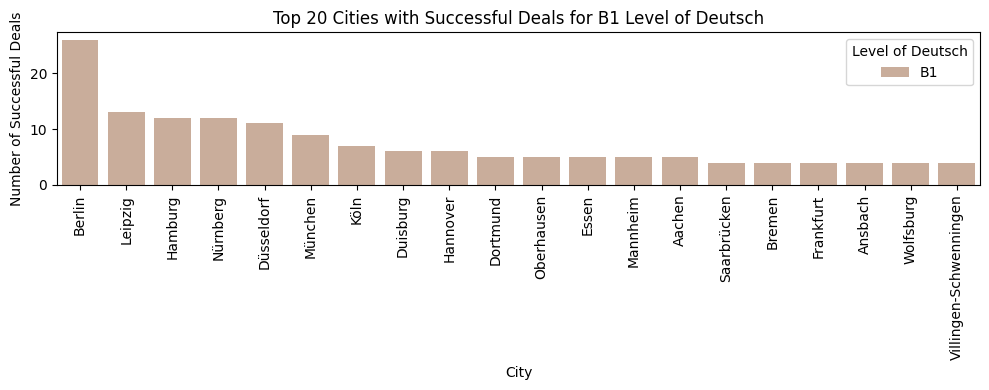

In [ ]:
successful_deals_B1 = successful_deals[successful_deals['Level of Deutsch'] == 'B1']
successful_deals_B1 = successful_deals_B1.sort_values(by='Deal Count', ascending=False)
top_successful_deals_B1 = successful_deals_B1.head(20)

# Строим график для уровня B1
plt.figure(figsize=(10, 4))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals_B1, palette='pink', hue='Level of Deutsch' )
plt.title('Top 20 Cities with Successful Deals for B1 Level of Deutsch')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

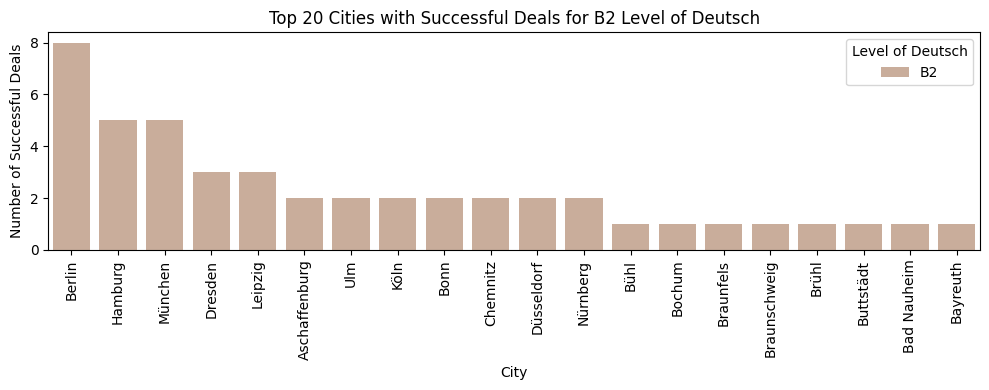

In [ ]:
successful_deals_B2 = successful_deals[successful_deals['Level of Deutsch'] == 'B2']
successful_deals_B2 = successful_deals_B2.sort_values(by='Deal Count', ascending=False)
top_successful_deals_B2 = successful_deals_B2.head(20)

# Строим график для уровня B2
plt.figure(figsize=(10, 4))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals_B2, palette='pink', hue='Level of Deutsch' )
plt.title('Top 20 Cities with Successful Deals for B2 Level of Deutsch')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

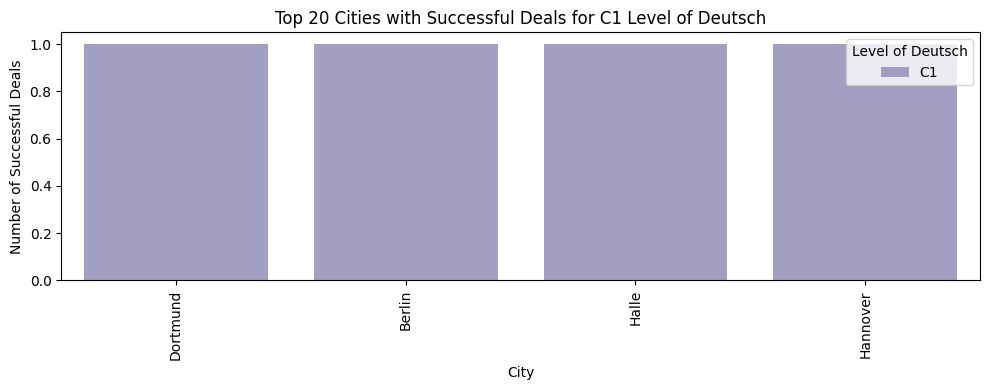

In [ ]:
successful_deals_C1 = successful_deals[successful_deals['Level of Deutsch'] == 'C1']
successful_deals_C1 = successful_deals_C1.sort_values(by='Deal Count', ascending=False)
top_successful_deals_C1 = successful_deals_C1.head(20)

# Строим график для уровня C1
plt.figure(figsize=(10, 4))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals_C1, palette='Purples', hue='Level of Deutsch' )
plt.title('Top 20 Cities with Successful Deals for C1 Level of Deutsch')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
language_success_pivot = language_success.pivot_table(index='Level of Deutsch', columns='Status', values='Deal Count', aggfunc='sum')
language_success_pivot

<ipython-input-123-134edb277ede>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  language_success_pivot = language_success.pivot_table(index='Level of Deutsch', columns='Status', values='Deal Count', aggfunc='sum')


Status,Successful,Unsuccessful
Level of Deutsch,,
A1,4,0
A2,22,1
B1,509,6
B2,112,0
C1,4,0
C2,1,0


# **3. Анализ эффективности работы отдела продаж:**

# Оцените эффективность отдельных владельцев сделок и рекламных кампаний с точки зрения количества обработанных сделок, коэффициента конверсии и
общей суммы продаж.


In [ ]:
print(deals['Status'].value_counts())

Status
Unsuccessful    10759
Successful       3211
Name: count, dtype: int64


In [ ]:
deals['Is Successful'] = deals['Status'] == 'Successful'

owner_campaigns = deals.groupby(['Deal Owner Name']).agg(
    total_deals=('Status', 'count'),
    successful_deals=('Is Successful', 'sum'),
    total_sales=('Initial Amount Paid', 'sum'),
    total_offer_amount=('Offer Total Amount', 'sum')
).reset_index()

owner_campaigns['conversion_rate'] = owner_campaigns['successful_deals'] / owner_campaigns['total_deals']
owner_campaigns.head(100)

,Deal Owner Name,total_deals,successful_deals,total_sales,total_offer_amount,conversion_rate
0,Alice Johnson,15,0,0.0,0.0,0.000000
1,Amy Green,25,0,0.0,0.0,0.000000
2,Ben Hall,998,241,236840.0,2101220.0,0.241483
3,Bob Brown,137,2,950.0,7800.0,0.014599
4,Cara Iverson,809,103,686800.0,950080.0,0.127318
5,Charlie Davis,1856,424,429370.0,3896648.0,0.228448
6,Diana Evans,595,53,50450.0,585000.0,0.089076
7,Eva Kent,351,62,65100.0,576340.0,0.176638
8,George King,66,4,2900.0,33280.0,0.060606
9,Ian Miller,302,30,29670.0,277020.0,0.099338


In [ ]:
owner_campaigns['total_offer_amount'] = owner_campaigns['total_offer_amount'].astype(int)
owner_campaigns['total_sales'] = owner_campaigns['total_sales'].astype(int)

# **УСПЕШНОСТЬ ПО КОЛ-ВУ СДЕЛОК ПО КАЖДОМУ МЕНЕДЖЕРУ**

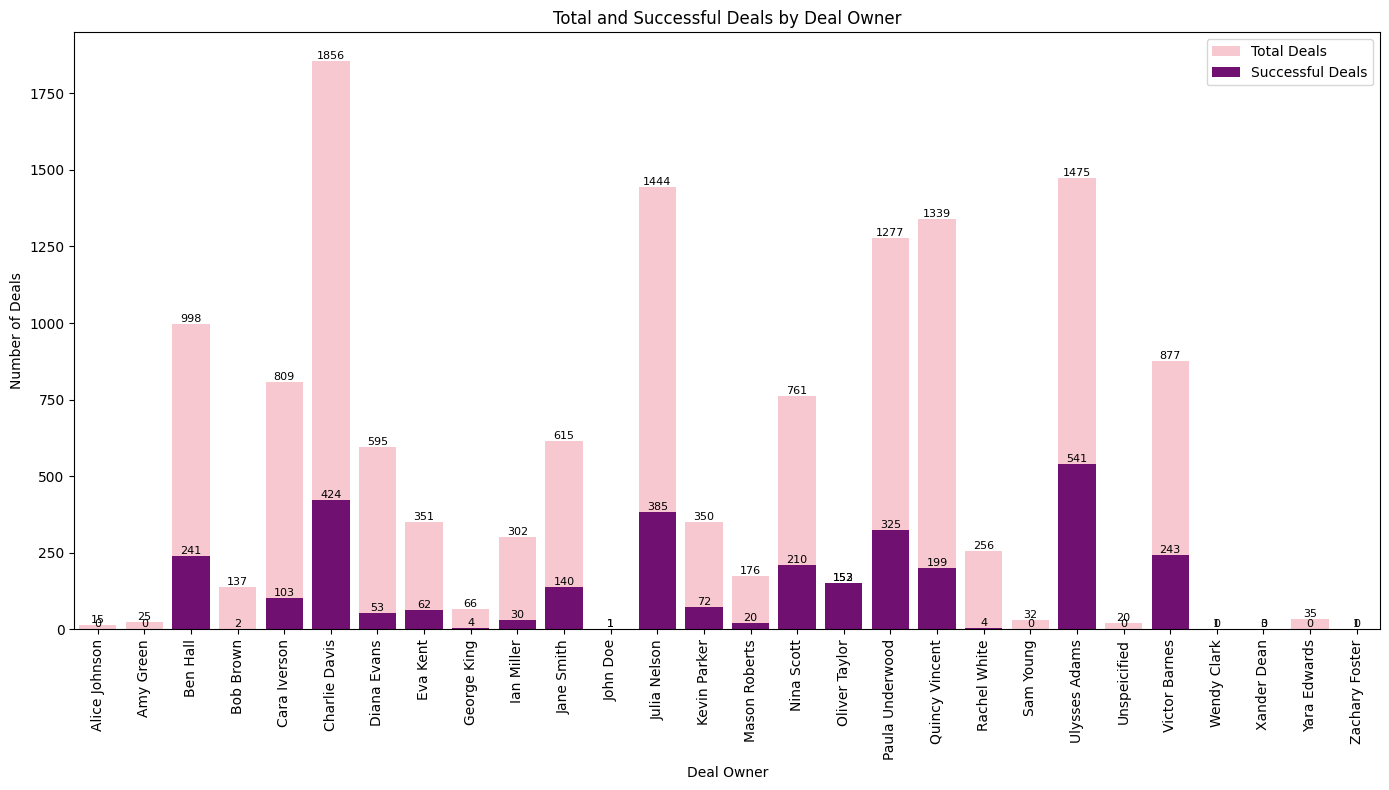

In [ ]:
plt.figure(figsize=(14, 8))

sns.barplot(x='Deal Owner Name', y='total_deals', data=owner_campaigns, color='pink', label='Total Deals')
sns.barplot(x='Deal Owner Name', y='successful_deals', data=owner_campaigns, color='purple', label='Successful Deals')

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=8, color='black')

plt.title('Total and Successful Deals by Deal Owner')
plt.xlabel('Deal Owner')
plt.ylabel('Number of Deals')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

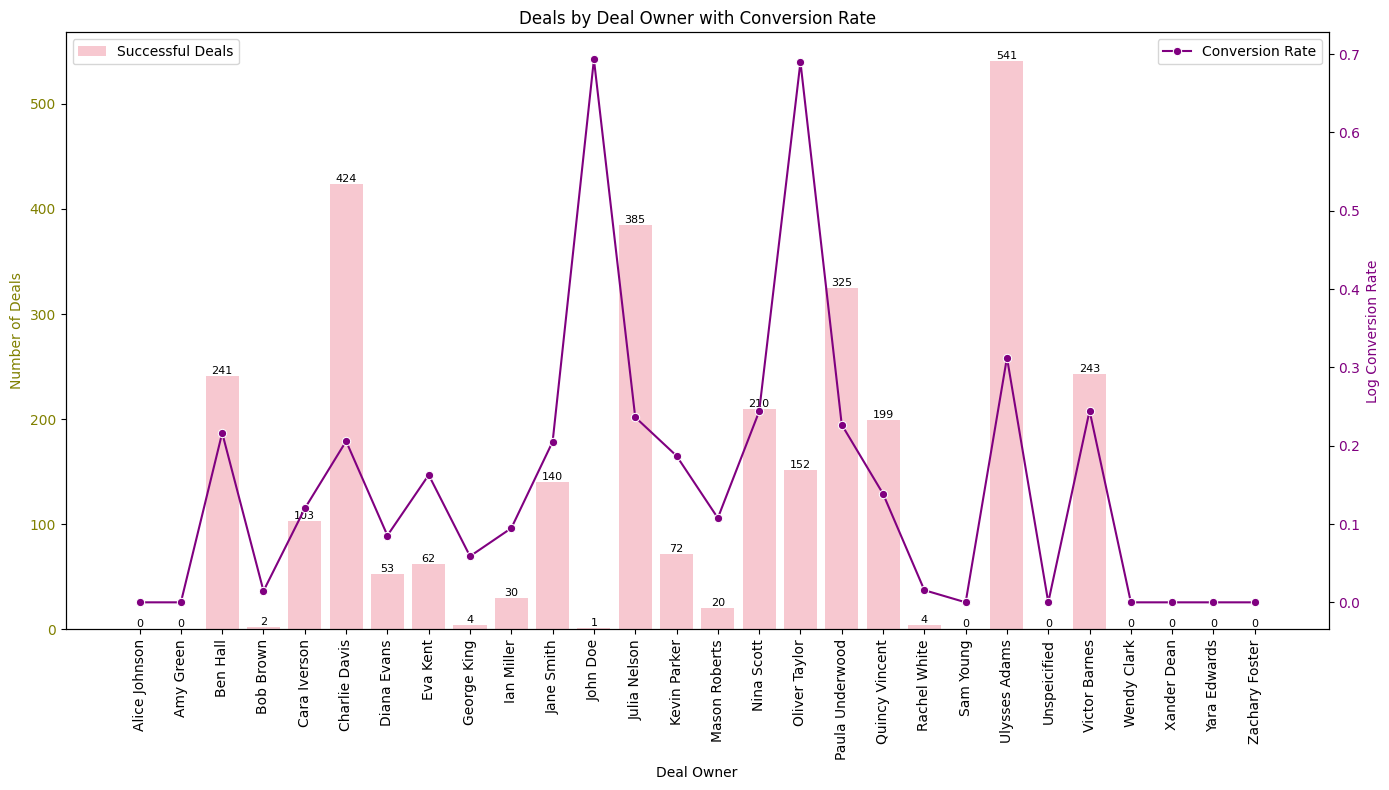

In [ ]:
owner_campaigns['log_conversion_rate'] = np.log(owner_campaigns['conversion_rate'] + 1) # Логарифмирую и добавляю 1, чтобы избежать деления на ноль
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(x='Deal Owner Name', y='successful_deals', data=owner_campaigns, color='pink', label='Successful Deals')

ax2 = ax1.twinx()
sns.lineplot(x='Deal Owner Name', y='log_conversion_rate', data=owner_campaigns, marker='o', color='purple', label='Conversion Rate')

for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', fontsize=8, color='black')

ax2.set_ylabel('Log Conversion Rate', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')


ax1.set_title('Deals by Deal Owner with Conversion Rate')
ax1.set_xlabel('Deal Owner')
ax1.set_ylabel('Number of Deals')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Number of Deals', color='olive')
ax1.tick_params(axis='y', labelcolor='olive')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

менеджеры демонстрируют существенно разные результаты. Некоторые имеют высокий коэффициент конверсии при сравнительно небольшом количестве сделок, в то время как другие заключают большое количество сделок, но с более низким коэффициентом конверсии.
Между количеством сделок и коэффициентом конверсии нет прямой пропорциональной зависимости. Это означает, что высокий объем работы не всегда гарантирует высокий процент успешных сделок.
Влияние индивидуальных факторов: Различия в результатах могут быть обусловлены различными факторами, такими как:
Навыки продаж, личные качества, умение общаться с разными типами клиентов. Так Оливер Тейлор имеет гораздо большую конверсию по сравнению с Адамсом, который работает с большим кол-вом клиентов, но с более низкой конверсией


<Figure size 1400x800 with 0 Axes>

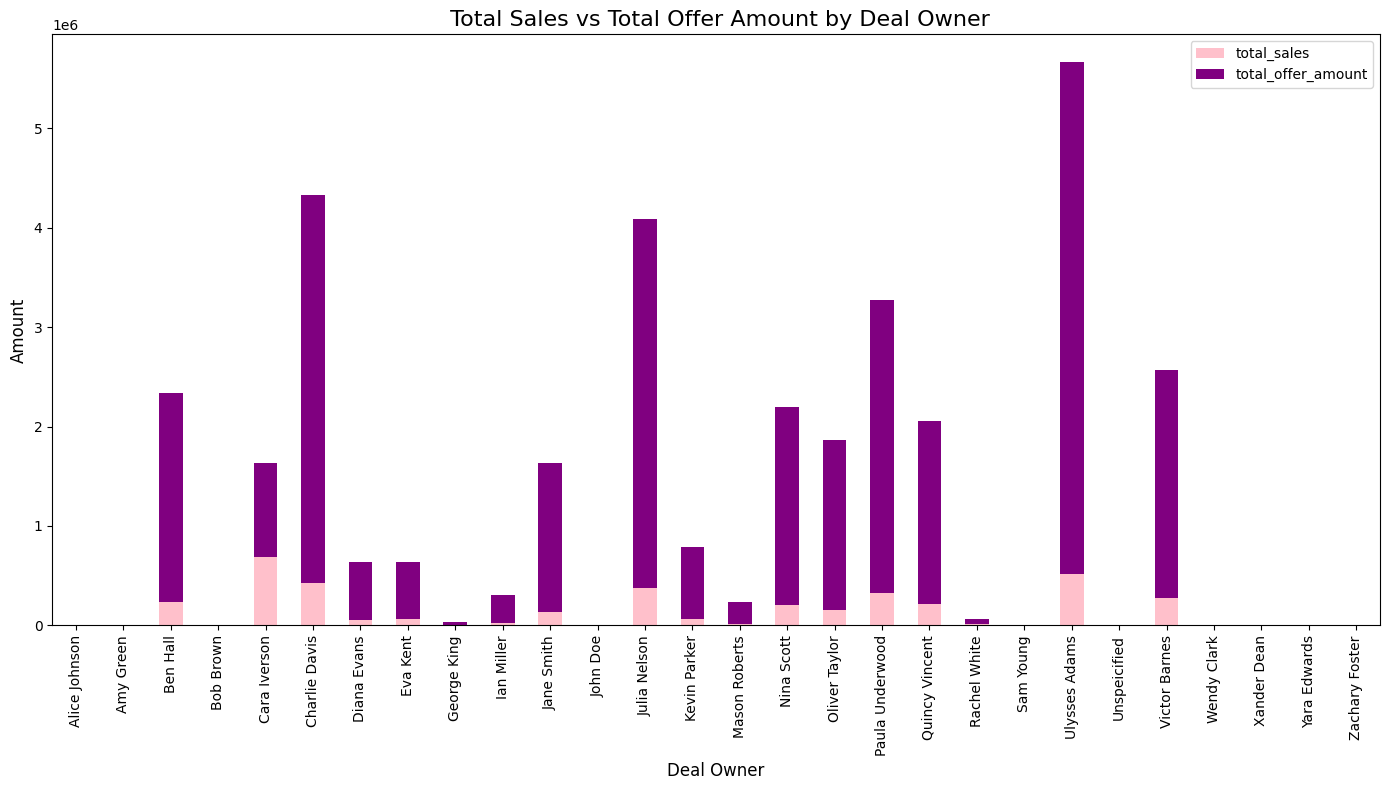

In [ ]:
plt.figure(figsize=(14, 8))

owner_campaigns.plot(kind='bar', x='Deal Owner Name', y=['total_sales', 'total_offer_amount'],
                     stacked=True, color=['pink', 'purple'], figsize=(14, 8))


plt.title(' Total Sales vs Total Offer Amount by Deal Owner', fontsize=16)
plt.xlabel('Deal Owner', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='')

plt.tight_layout()
plt.show()

In [ ]:
owner_campaigns_print = deals.groupby(['Deal Owner Name']).agg(
    total_sales=('Initial Amount Paid', 'sum'),
    total_offer_amount=('Offer Total Amount', 'sum')
)
owner_campaigns_print = owner_campaigns_print.sort_values(by='total_sales', ascending=False)
owner_campaigns_print = owner_campaigns_print[owner_campaigns_print['total_sales'] != 0]
owner_campaigns_print

,total_sales,total_offer_amount
Deal Owner Name,,
Cara Iverson,686800.0,950080.0
Ulysses Adams,521170.0,5138160.0
Charlie Davis,429370.0,3896648.0
Julia Nelson,377620.0,3704141.0
Paula Underwood,324410.0,2949540.0
Victor Barnes,276144.0,2290320.0
Ben Hall,236840.0,2101220.0
Quincy Vincent,218160.0,1832700.0
Nina Scott,201400.0,1992520.0


Хитмеп, который отображает причины отказа по каждому менеджеру. Здесь можно увидеть, что наибольшее кол-во отказов указано, как Нет ответа, что говорит об отсутствии проведения треннингов по заполнению CRM и невозможности провести анализ качественно

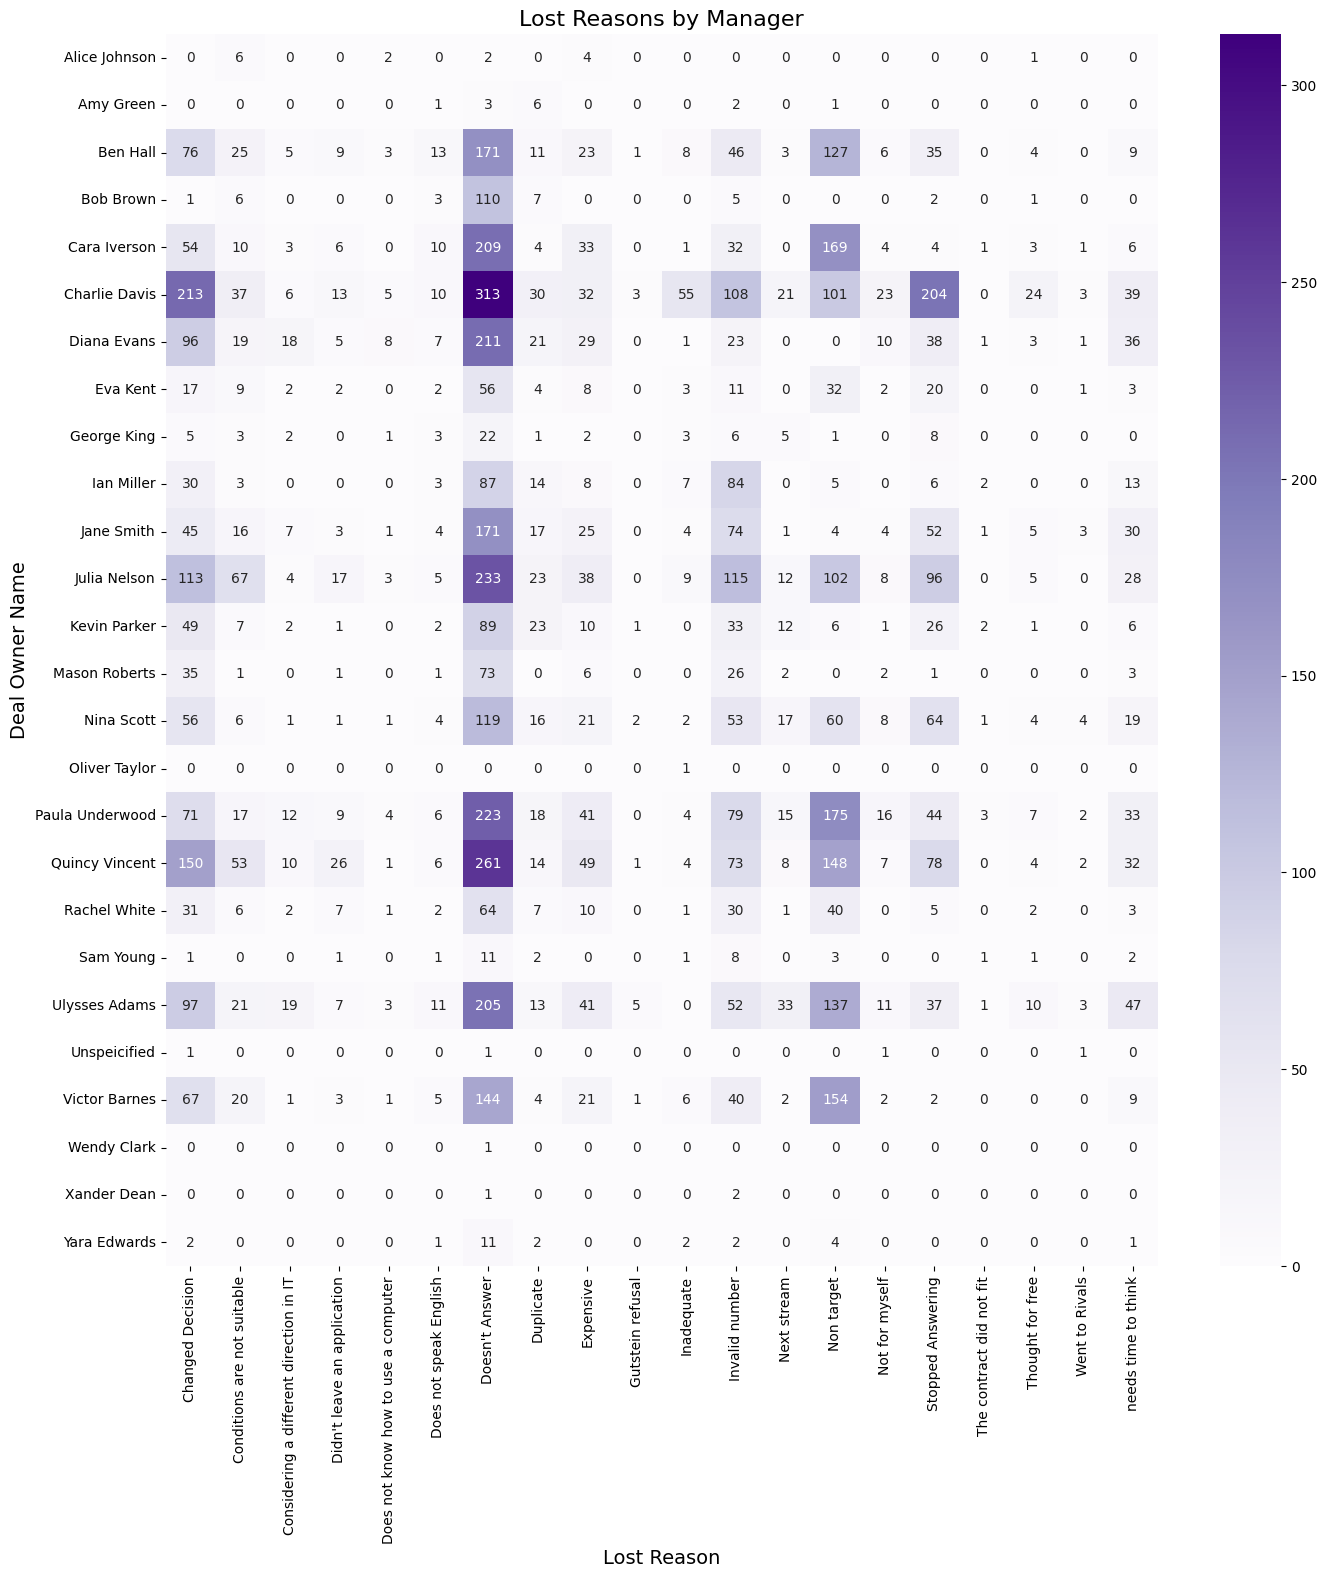

In [ ]:
filtered_deals = deals[deals['Lost Reason'] != 'No reason']
pivot_table = filtered_deals.pivot_table(
    index='Deal Owner Name',
    columns='Lost Reason',
    values='Contact Name',
    aggfunc='count',
    fill_value=0
)

pivot_table = pivot_table.round(0).astype(int)

plt.figure(figsize=(16, 16))
sns.heatmap(pivot_table, cmap='Purples', annot=True, fmt='d')
plt.title('Lost Reasons by Manager', fontsize=16)
plt.xlabel('Lost Reason', fontsize=14)
plt.ylabel('Deal Owner Name', fontsize=14)
plt.show()


**Построение зависимости конверсии и тотал аммаунт в работе менеджеров при продаже услуги**

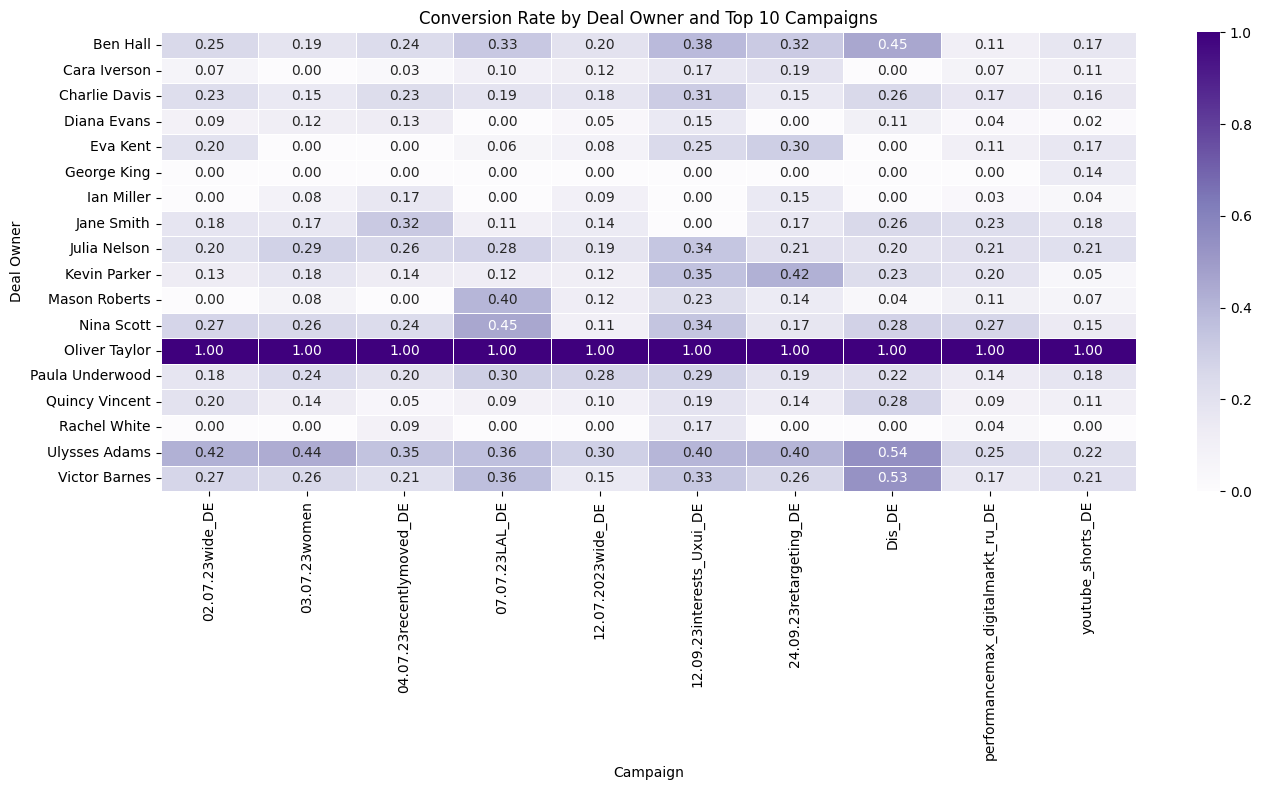

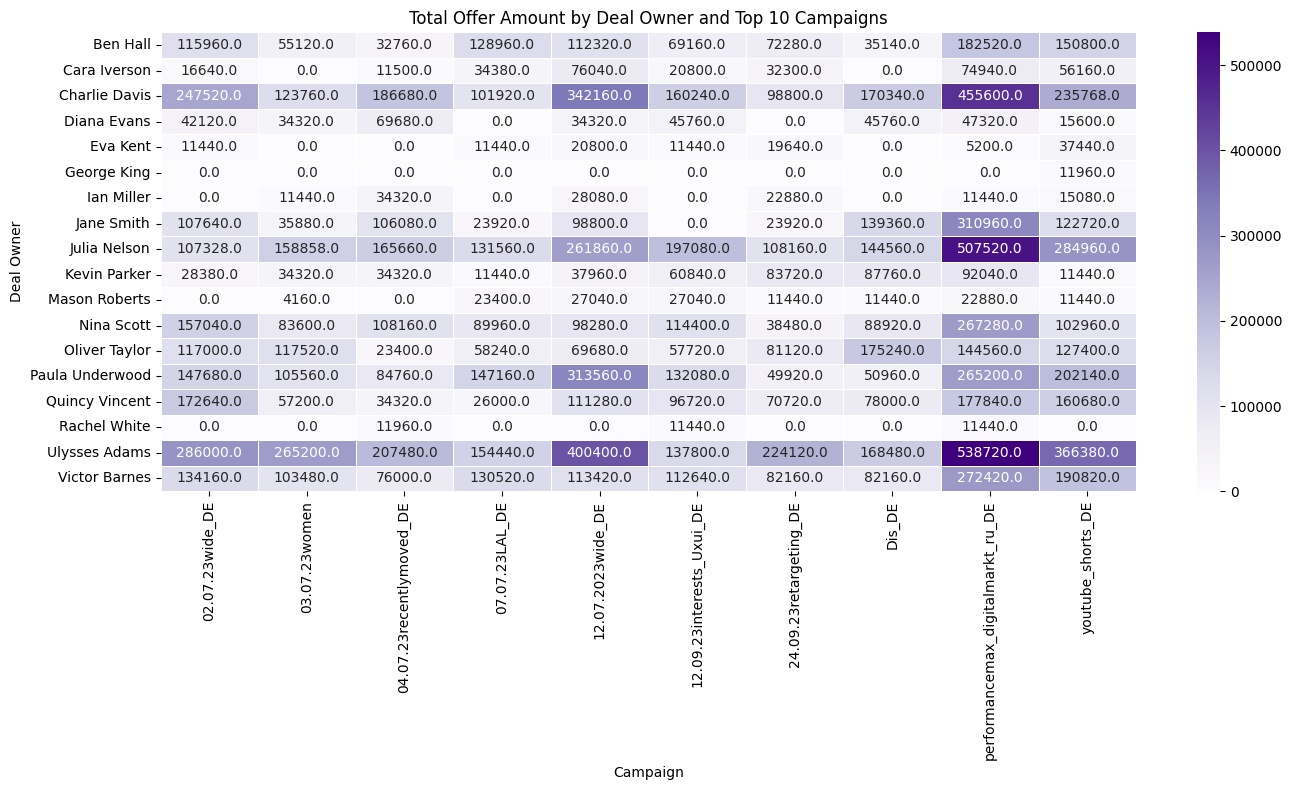

In [ ]:
owner_campaigns = deals[deals['Campaign'] != 'No campaign'].groupby(['Deal Owner Name', 'Campaign']).agg(
    total_deals=('Status', 'count'),
    successful_deals=('Is Successful', 'sum'),
    total_sales=('Initial Amount Paid', 'sum'),
    total_offer_amount=('Offer Total Amount', 'sum')
).reset_index()

owner_campaigns['conversion_rate'] = owner_campaigns['successful_deals'] / owner_campaigns['total_deals']


top_campaigns = owner_campaigns.groupby('Campaign')['successful_deals'].sum().sort_values(ascending=False).head(10).index

filtered_owner_campaigns = owner_campaigns[owner_campaigns['Campaign'].isin(top_campaigns)]
conversion_heatmap_data = filtered_owner_campaigns.pivot_table(
    values='conversion_rate',
    index='Deal Owner Name',
    columns='Campaign',
    aggfunc='mean',
    fill_value=0
)

conversion_heatmap_data = conversion_heatmap_data.loc[
    (conversion_heatmap_data.sum(axis=1) > 0),
    (conversion_heatmap_data.sum(axis=0) > 0)
]

plt.figure(figsize=(14, 8))
sns.heatmap(conversion_heatmap_data, annot=True, cmap='Purples', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Conversion Rate by Deal Owner and Top 10 Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Deal Owner')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

offer_amount_heatmap_data = filtered_owner_campaigns.pivot_table(
    values='total_offer_amount',
    index='Deal Owner Name',
    columns='Campaign',
    aggfunc='sum',
    fill_value=0
)

offer_amount_heatmap_data = offer_amount_heatmap_data.loc[
    (offer_amount_heatmap_data.sum(axis=1) > 0),
    (offer_amount_heatmap_data.sum(axis=0) > 0)
]

plt.figure(figsize=(14, 8))
sns.heatmap(offer_amount_heatmap_data, annot=True, cmap='Purples', fmt='.1f', cbar=True, linewidths=0.5)
plt.title('Total Offer Amount by Deal Owner and Top 10 Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Deal Owner')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **ЗАВИСИМОСТЬ УСПЕШНОСТИ ОТ ТИПА ПЛАТЕЖА**

Тип оплаты оказывает существенное влияние на сумму начального платежа. Клиенты, выбирающие разовые платежи, в среднем платят больше, чем клиенты, выбирающие регулярные платежи.
Продукт также влияет на сумму начального платежа. Продукты Digital Marketing и UX/UI Design в среднем стоят дороже, чем Web Developer.




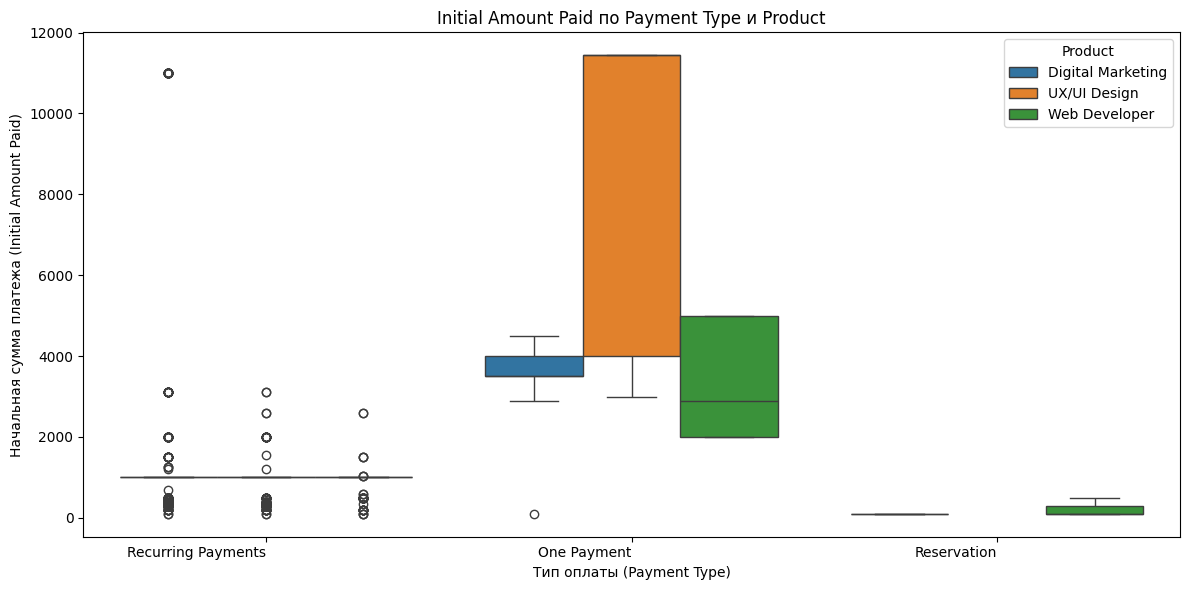

In [ ]:
filtered_deals = deals[
    (deals['Initial Amount Paid'] > 0) &
    (deals['Product'] != 'Not chosen')
]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_deals,
    x='Payment Type',
    y='Initial Amount Paid',
    hue='Product'
)

plt.title('Initial Amount Paid по Payment Type и Product')
plt.xlabel('Тип оплаты (Payment Type)')
plt.ylabel('Начальная сумма платежа (Initial Amount Paid)')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

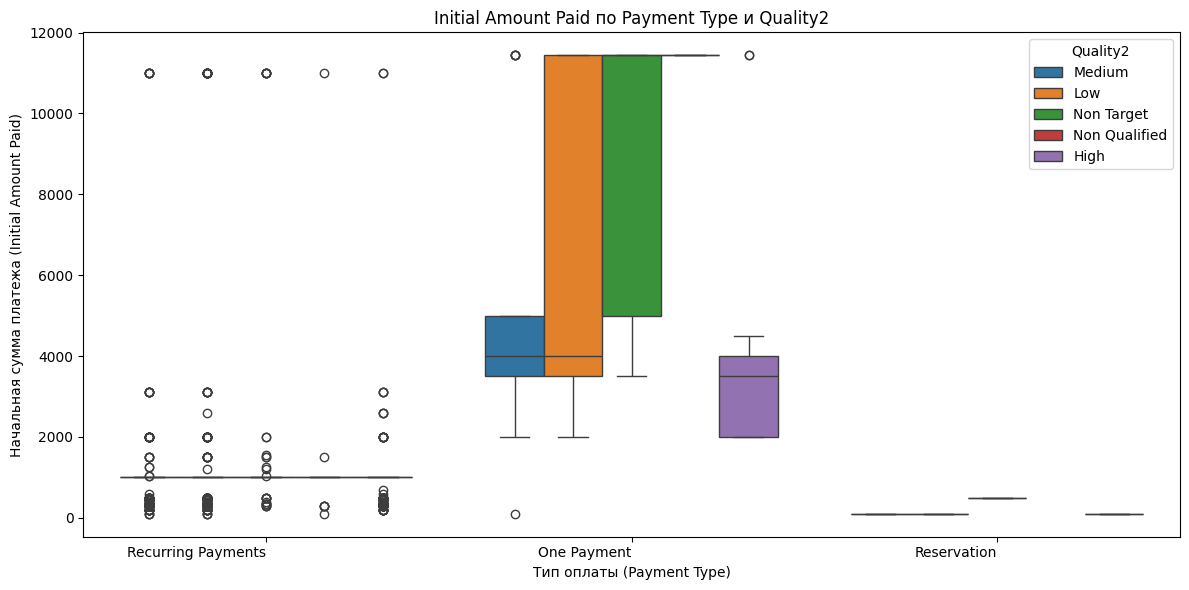

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_deals,
    x='Payment Type',
    y='Initial Amount Paid',
    hue='Quality2'
)

plt.title('Initial Amount Paid по Payment Type и Quality2')
plt.xlabel('Тип оплаты (Payment Type)')
plt.ylabel('Начальная сумма платежа (Initial Amount Paid)')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

Клиенты, выбирающие разовые платежи и более высокое качество, в среднем платят больше. Recurring Payments например имеют наименьшую медиану и размах, что указывает на более низкие начальные платежи по сравнению с другими типами оплаты. Большое количество выбросов свидетельствует о значительном разнообразии платежей в этом сегменте.

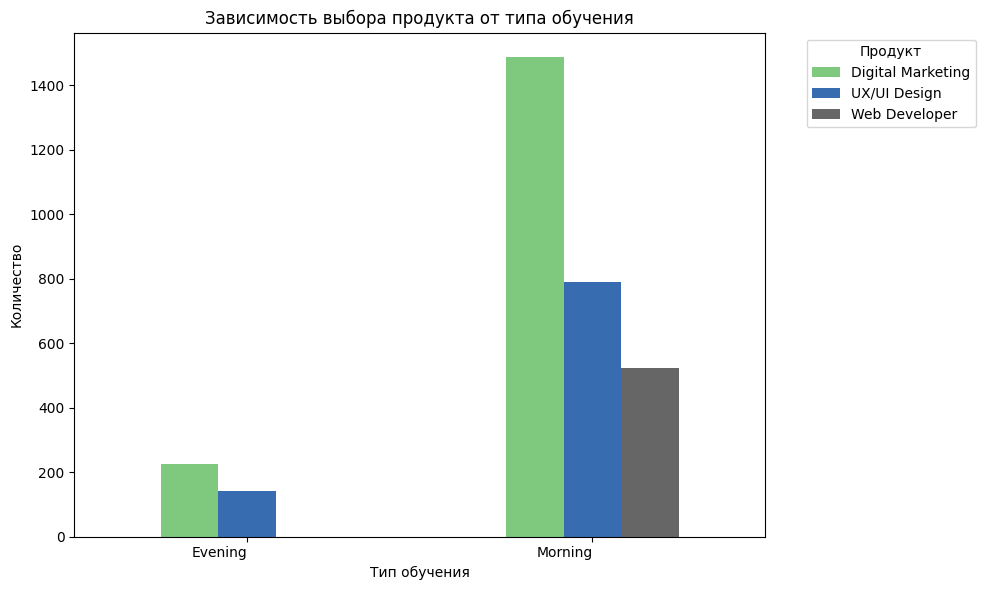

In [ ]:
filtered_deals = deals[(deals['Product'] != 'Not chosen')&(deals['Education Type'] != 'No info')]

grouped = filtered_deals.groupby(['Education Type', 'Product']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))

grouped.plot(kind='bar', stacked=False, ax=ax, colormap='Accent')


plt.title('Зависимость выбора продукта от типа обучения')
plt.xlabel('Тип обучения')
plt.ylabel('Количество')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Продукт', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
product_sales_start = deals.groupby('Product')['Created Time'].min().reset_index()
product_sales_start['Created Time'] = pd.to_datetime(product_sales_start['Created Time'])

product_sales_start

,Product,Created Time
0,Digital Marketing,2023-07-04
1,Not chosen,2023-07-03
2,UX/UI Design,2023-07-19
3,Web Developer,2023-07-18


In [ ]:
average_offer_amount = deals.groupby('Product')['Offer Total Amount'].mean().reset_index()
average_offer_amount

,Product,Offer Total Amount
0,Digital Marketing,10267.058594
1,Not chosen,8461.818182
2,UX/UI Design,9873.731020
3,Web Developer,5650.518234
